##               Lead Scoring Case Study    - Malini S, Ricky Samuel, Sumit Tiwari        

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
 <img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

 There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

### Algorithm:

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Reading the dataset

### A. Conversion of data into dataframe

In [2]:
# loading the data
lead_df=pd.read_csv("Leads.csv")
lead_df.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### 2. Examining the dataframe

In [3]:
#Checking the shape of the data
lead_df.shape

(9240, 37)

In [4]:
# Checking the columns
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Checking the summary of numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking unique values in each column
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
#checking for duplicate rows
lead_df.duplicated().sum()

0

There are no duplicated rows

In [8]:
# Checking the information about the dataframe
lead_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Checking for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

• Null values are present in some columns

## 2. Data cleaning

#### Replacing "Select" as NULL values

In [10]:
#Replacing the Select 
lead_df=lead_df.replace("Select",np.nan)
# Checking the dataframe after replacing select into NULL values
lead_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


#### Calculating the percentage of null values in each column

In [11]:
# Checking the values of null percentage
round((lead_df.isnull().sum()/len(lead_df)*100),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

• Greater number of null values are found in few columns
• The null value percentage whose values more than 40% could be dropped
• There are 7 columns whose null values percentage are greater than 40.

#### Removing/Dropping  columns whose percentage of null values greater than 40%

In [12]:
# Dropping of columns whose percentage is greater than 40
lead_df=lead_df.drop(columns=["How did you hear about X Education","Lead Profile","Lead Quality","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Activity Index","Asymmetrique Profile Index"],axis=1)


#### Checking the dimensions of the dataframe after removing 40% null values columns

In [13]:
#Checking the rows and columns after 7 columns are dropped
lead_df.shape

(9240, 30)

Hence, 7 columns are dropped(null value percentage > 40)

In [14]:
# Checking the values of null percentage after dropping 7 columns
round((lead_df.isnull().sum()/len(lead_df)*100),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [15]:
#Checking columns
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Handling missing values

### A. Seggregation of numerical and categorical columns

### Numerical Columns

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
The skew values is: 2.871792896566408


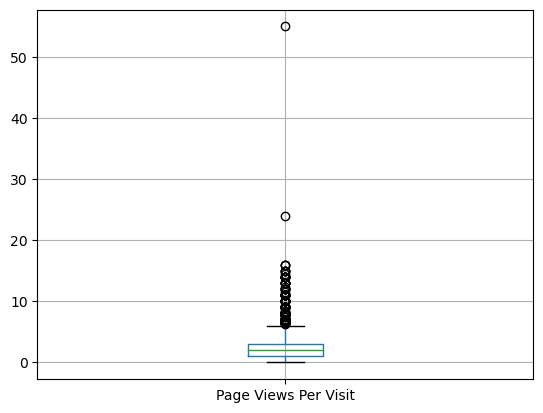

In [16]:
print(lead_df["Page Views Per Visit"].describe())
print("The skew values is:",lead_df["Page Views Per Visit"].skew())
lead_df.boxplot(column=["Page Views Per Visit"])
plt.show()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
The skew values is: 19.911657340056212


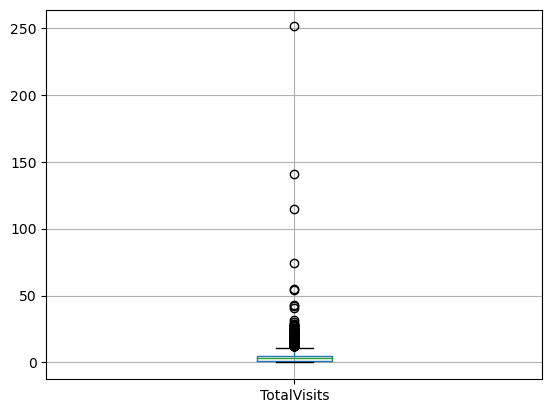

In [17]:
print(lead_df["TotalVisits"].describe())
print("The skew values is:",lead_df["TotalVisits"].skew())
lead_df.boxplot(column=["TotalVisits"])
plt.show()

### Imputation on Numerical columns

In [18]:
#Page Views Per Visit
lead_df["Page Views Per Visit"].fillna(lead_df["Page Views Per Visit"].mean(),inplace=True)
#TotalVisits
lead_df["TotalVisits"].fillna(lead_df["TotalVisits"].mean(),inplace=True)
#application_df.EXT_SOURCE_3.fillna(application_df.EXT_SOURCE_3.mean(),inplace=True)

In [19]:
# Checking the values of null percentage
round((lead_df.isnull().sum()/len(lead_df)*100),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
X Education Forums                                0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Search    

Both the numerical column has been imputed by mean value and null percentage is zero

### Categorical columns

#### 1. City

In [20]:
# City has 39.71% null values
print("The statistical values are:\n",lead_df.City.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df.City.value_counts(normalize=True),2)*100)


The statistical values are:
 count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64


Since City is a categorical column, it can be imputed with mode value

In [21]:
#Imputation on categorical column - City
lead_df.City.fillna(lead_df.City.mode()[0],inplace=True)

#### 2.Specialization 

In [22]:
#Specialization has 36.58% null value
print("The statistical values are:\n",lead_df.Specialization.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df.Specialization.value_counts(normalize=True),2)*100)

The statistical values are:
 count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Ex

Since Specialization is a categorical column, and the null percentage value is 37%, so there are chances that it might be one of the categorical columns.
Hence, null value is replaced as "Additional elective"

In [23]:
# replacing null value with "Additional elective"
lead_df["Specialization"]=lead_df["Specialization"].replace(np.nan,"Additional elective")

In [24]:
# To check null value is converted into Additional elective category
round(lead_df["Specialization"].value_counts(normalize=True),2)*100

Additional elective                  37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: Specialization, dtype: float64

#### 3. Tags

In [25]:
#Tags has 36% null value
print("The statistical values are:\n",lead_df.Tags.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df.Tags.value_counts(normalize=True),2)*100)

The statistical values are:
 count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number               

Since Tags is a categorical column, it can be imputed with mode value

In [26]:
#Imputation on categorical column - Tags
lead_df.Tags.fillna(lead_df.Tags.mode()[0],inplace=True)

#### 4. What matters most to you in choosing a course

In [27]:
#What matters most to you in choosing a course has 29.32% null value
print("The statistical values are:\n",lead_df["What matters most to you in choosing a course"].describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df["What matters most to you in choosing a course"].value_counts(normalize=True),2)*100)

The statistical values are:
 count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64


Here 100% values are for "Better career Prospectus". Usually the customers would do a course for "Better Career Prospectus". 
This column is highly skewed. So, this column could be dropped.

In [28]:
#Dropping this column
lead_df=lead_df.drop("What matters most to you in choosing a course",axis=1)

#### 5. What is your current occupation

In [29]:
#What is your current occupation has 29.11% null value
print("The statistical values are:\n",lead_df["What is your current occupation"].describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df["What is your current occupation"].value_counts(normalize=True),2)*100)

The statistical values are:
 count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64


"What is your current occupation" can be imputed with mode value

In [30]:
#Imputation on categorical column - What is your current occupation
lead_df["What is your current occupation"].fillna(lead_df["What is your current occupation"].mode()[0],inplace=True)

#### 6. Country

In [31]:
#Country has 26.63% null value
print("The statistical values are:\n",lead_df["Country"].describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df["Country"].value_counts(normalize=True),2)*100)

The statistical values are:
 count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
P

Since, most values belongs to "India", it could be imputed with mode

In [32]:
#Imputation on categorical column - Country
lead_df["Country"].fillna(lead_df["Country"].mode()[0],inplace=True)

#### 7. Last Activity

In [33]:
#Last Activity has 1.11% null value
print("The statistical values are:\n",lead_df["Last Activity"].describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df["Last Activity"].value_counts(normalize=True),2)*100)

The statistical values are:
 count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Email Opened                    38.0
SMS Sent                        30.0
Olark Chat Conversation         11.0
Page Visited on Website          7.0
Converted to Lead                5.0
Email Bounced                    4.0
Email Link Clicked               3.0
Form Submitted on Website        1.0
Unreachable                      1.0
Unsubscribed                     1.0
Had a Phone Conversation         0.0
Approached upfront               0.0
View in browser link Clicked     0.0
Email Received                   0.0
Email Marked Spam                0.0
Visited Booth in Tradeshow       0.0
Resubscribed to emails           0.0
Name: Last Activity, dtype: float64


"Last Activity" column could be imputed with mode value

In [34]:
#Imputation on categorical column -  Last Activity
lead_df["Last Activity"].fillna(lead_df["Last Activity"].mode()[0],inplace=True)

#### 8. Lead Source

In [35]:
#Lead Source has 0.39% null value
print("The statistical values are:\n",lead_df["Lead Source"].describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(lead_df["Lead Source"].value_counts(normalize=True),2)*100)

The statistical values are:
 count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Google               31.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       13.0
Reference             6.0
Welingak Website      2.0
Referral Sites        1.0
Facebook              1.0
bing                  0.0
google                0.0
Click2call            0.0
Press_Release         0.0
Social Media          0.0
Live Chat             0.0
youtubechannel        0.0
testone               0.0
Pay per Click Ads     0.0
welearnblog_Home      0.0
WeLearn               0.0
blog                  0.0
NC_EDM                0.0
Name: Lead Source, dtype: float64


"Lead Source" column could be imputed with mode value

In [36]:
#Imputation on categorical column -  Lead Source
lead_df["Lead Source"].fillna(lead_df["Lead Source"].mode()[0],inplace=True)

#### Checking for any other null values in the dataframe.

In [37]:
# Checking the values of null percentage
round((lead_df.isnull().sum()/len(lead_df)*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

### Removing unwanted columns

In [38]:
#Checking the columns of dataframe
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Removing columns that do not give relevant information

In [39]:
#Dropping columns
print("Before dropping columns",lead_df.shape)
lead_df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)
print("After dropping columns",lead_df.shape)

Before dropping columns (9240, 29)
After dropping columns (9240, 27)


In [40]:
#Checking the columns which has one unique value
lead_df.describe(include='object') 


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,38,19,6,2,1,...,2,2,1,26,1,1,6,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,India,Additional elective,Unemployed,No,No,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
freq,4886,2904,8506,9238,3540,8953,3380,8290,9226,9240,...,9236,9233,9240,5425,9240,9240,6891,9240,6352,3407


#### Removing columns which have only one unique value

In [41]:
#Dropping columns which has only one unique value
print("Before dropping columns",lead_df.shape)
lead_df.drop(["Receive More Updates About Our Courses","Get updates on DM Content","I agree to pay the amount through cheque","Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content"],axis=1,inplace=True)
print("After dropping columns",lead_df.shape)

Before dropping columns (9240, 27)
After dropping columns (9240, 22)


## 3. Exploratory Data Analysis

#### 1. a. Checking Data Imbalance percentage

In [42]:
#Dividing dataframe into lead0 and lead1
lead0 =lead_df.loc[lead_df["Converted"]==0]
lead1 =lead_df.loc[lead_df["Converted"]==1]

In [43]:
#Checking imbalance percentage
print(len(lead0)/len(lead1))

1.594776748104465


• The imbalance ratio is given as 1.59

#### 1. b. Lead converted ratio

Lead converted ratio says that how many customers have been converted into lead.

In [44]:
#Target variable: Converted. The value 0 represents not converted into lead and value 1 represents converted into lead
lead_converted_ratio=(lead_df["Converted"].sum()/len(lead_df["Converted"]))*100
print(lead_converted_ratio)

38.53896103896104


only 38.54% of customers are converted into lead

Let's check this visually

0    61.461039
1    38.538961
Name: Converted, dtype: float64


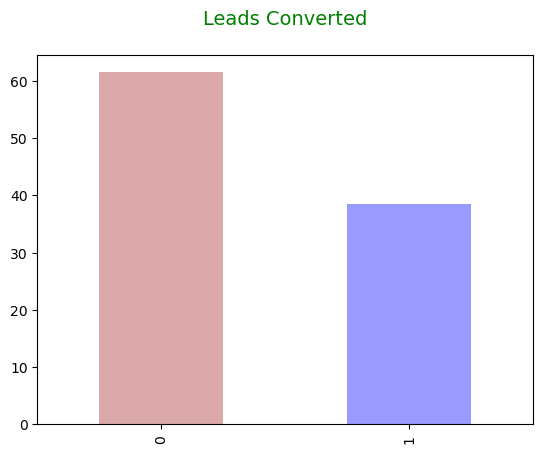

In [45]:
print(lead_df["Converted"].value_counts()/len(lead_df["Converted"])*100)
(100*(lead_df["Converted"].value_counts(normalize=True))).plot.bar(color=["Brown","Blue"],alpha=0.4)
# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 14, 'fontweight' : 10, 'color' : 'Green'})
plt.show()

### 2. Univariate Analysis

### Categorical Columns

### 1. Lead Origin

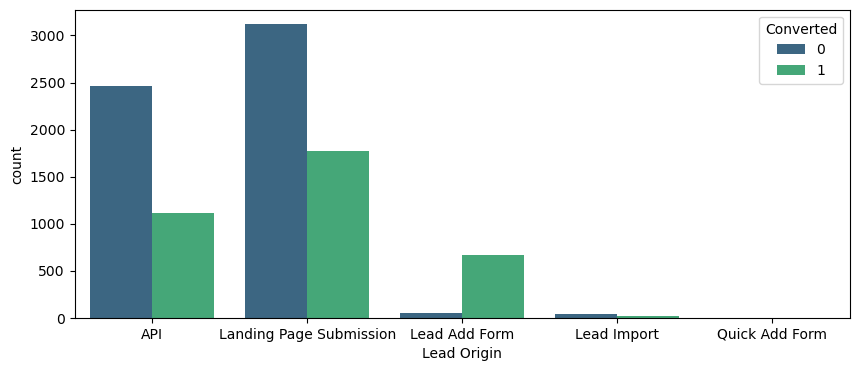

In [46]:
#Lead Origin
plt.figure(figsize=(10,4))
sns.countplot(x="Lead Origin",hue="Converted",data=lead_df,palette="viridis")
plt.show()

• Landing Page Submission, API and Lead Add Form has turned into higher conversion leads.

### 2. Lead Source

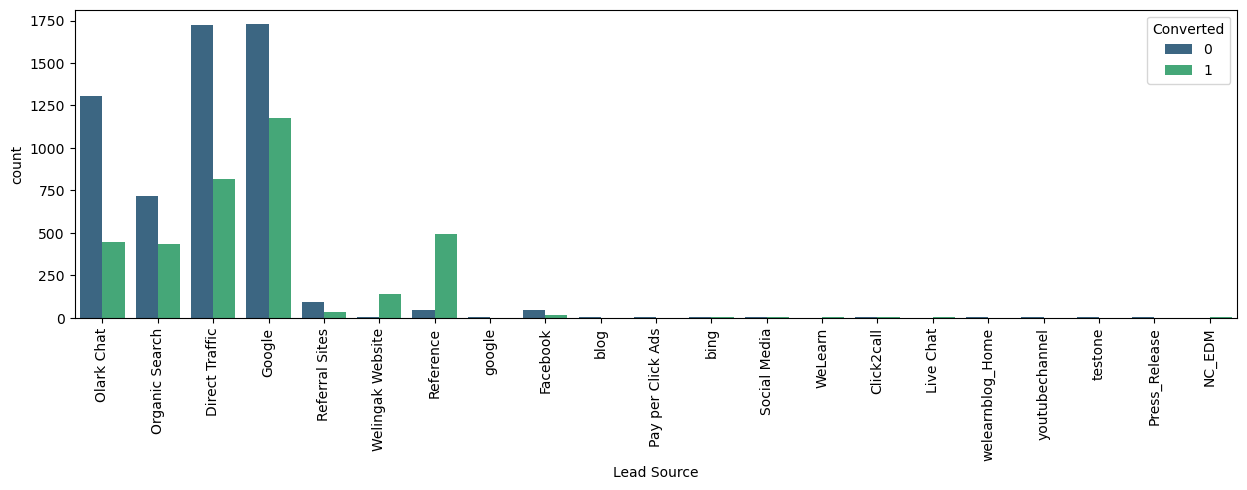

In [47]:
#Lead Source
plt.figure(figsize=(15,4))
sns.countplot(x="Lead Source",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()


• we can see there is a column named "Google" and "google". So "google" can be replaced as "Google"

In [48]:
#Replacing google by Google
lead_df["Lead Source"]=lead_df["Lead Source"].replace(["google"],"Google")

• Also, in few columns, there are no values. So, such columns could be replaced as "Others"

In [49]:
lead_df["Lead Source"]=lead_df["Lead Source"].replace(["blog","Pay per Click Ads","Social Media","WeLearn","Click2call","Live Chat","welearnblog_Home","youtubechannel","testone","Press_Release","NC_EDM","bing"],"Others")

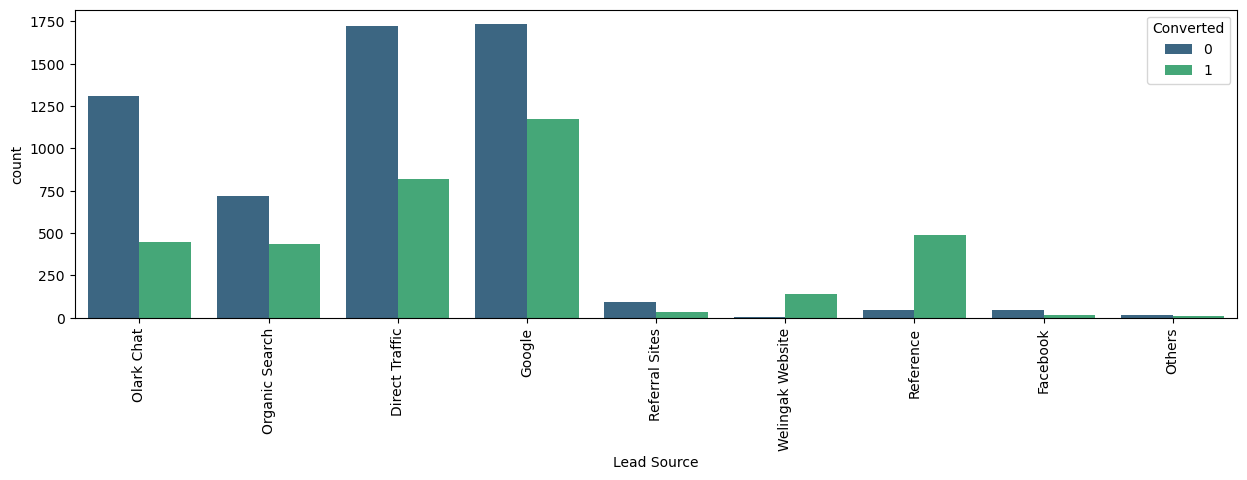

In [50]:
#Checking Lead Source
plt.figure(figsize=(15,4))
sns.countplot(x="Lead Source",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

### 3. Do Not Email

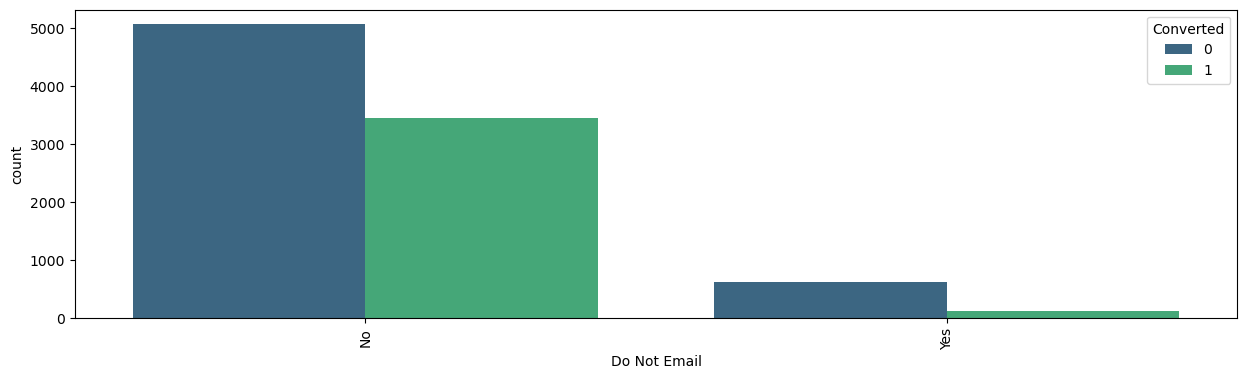

In [51]:
#Do Not Email
plt.figure(figsize=(15,4))
sns.countplot(x="Do Not Email",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

### 4. Do Not Call

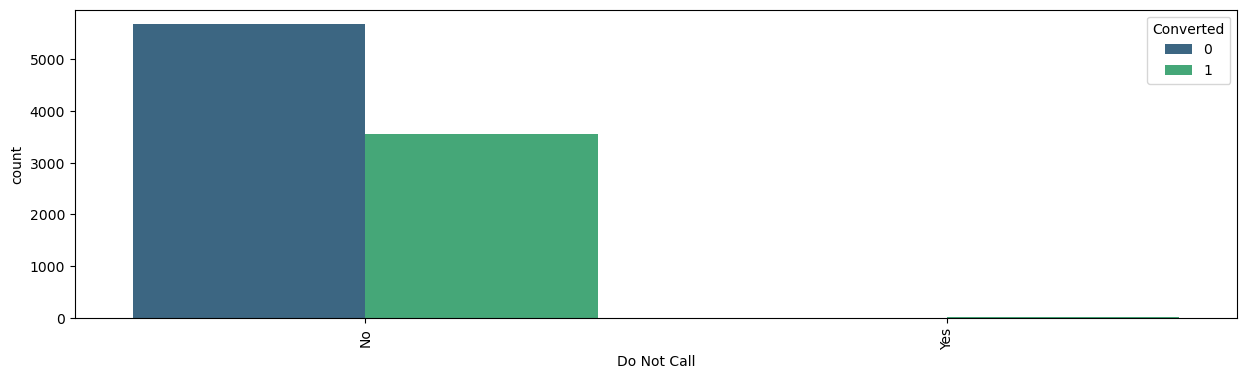

In [52]:
#Do Not Call
plt.figure(figsize=(15,4))
sns.countplot(x="Do Not Call",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

### 5. Last Activity

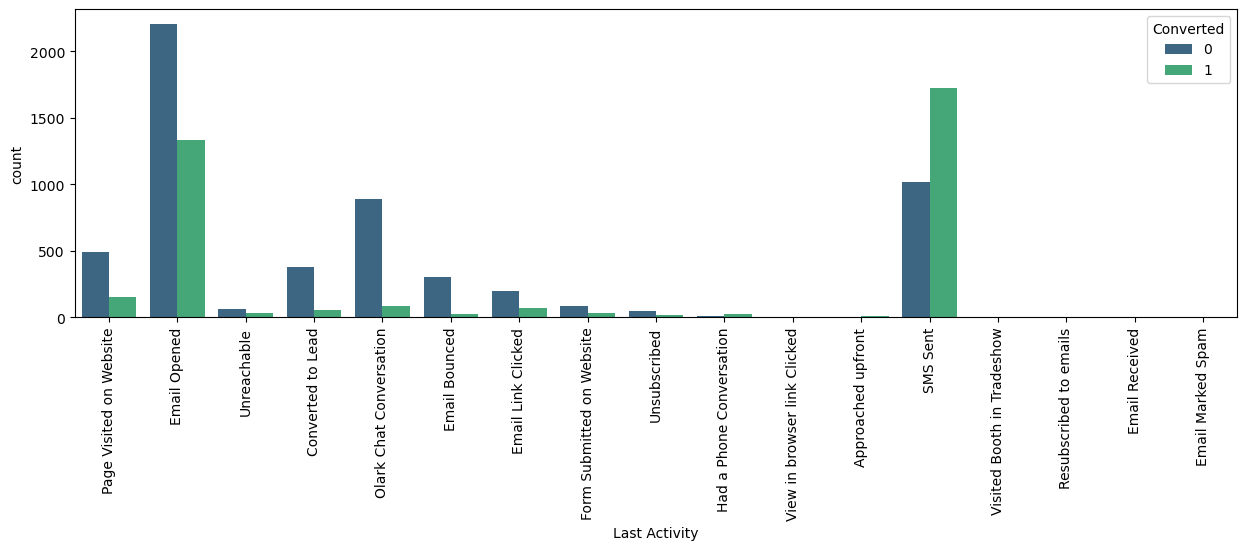

In [53]:
#Last Activity
plt.figure(figsize=(15,4))
sns.countplot(x="Last Activity",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• There are no values present in few columns. Those columns can be grouped as "Others"

In [54]:
# replacing few columns with others
lead_df["Last Activity"]=lead_df["Last Activity"].replace(["View in browser link Clicked","Approached upfront","Visited Booth in Tradeshow","Resubscribed to emails","Email Received","Email Marked Spam"],"Others")

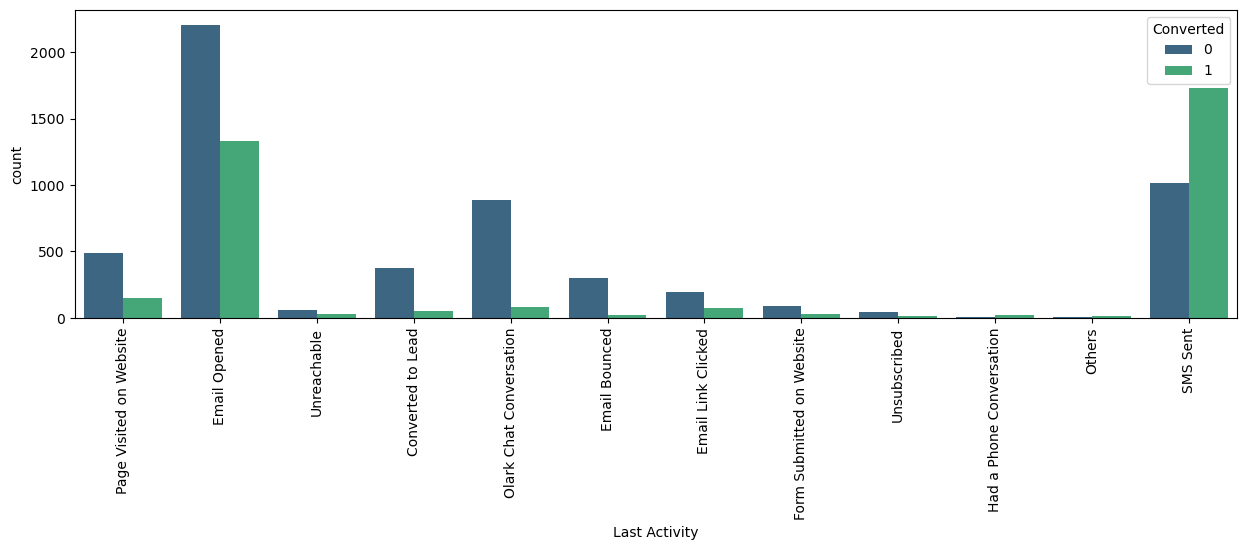

In [55]:
# checking Last Activity
plt.figure(figsize=(15,4))
sns.countplot(x="Last Activity",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• Lead conversion rate for SMS sent and Email Opened turned out to be higher.

### 6. Country

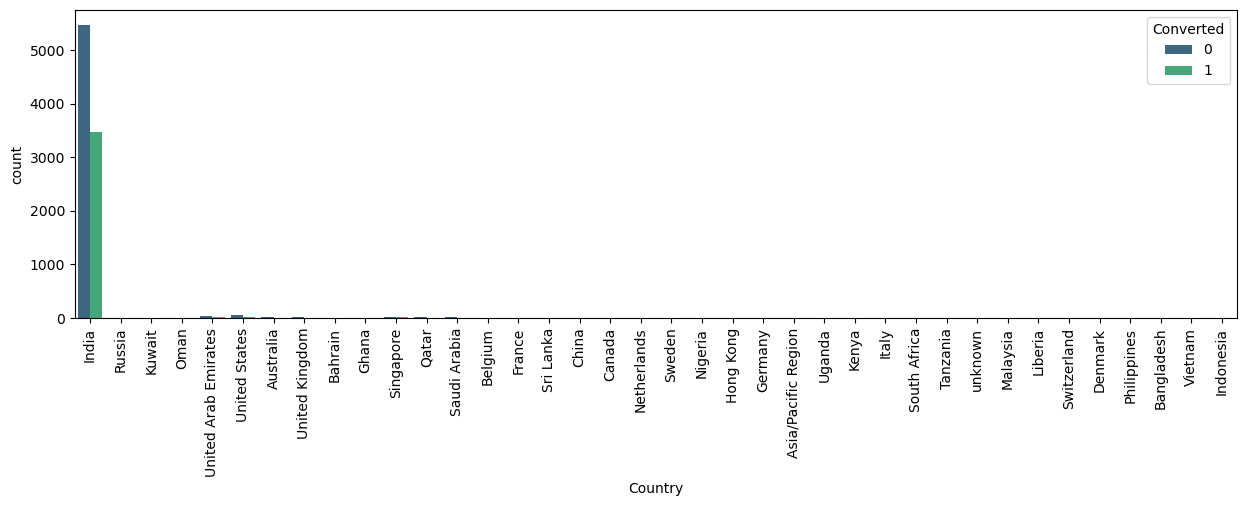

In [56]:
#Country
plt.figure(figsize=(15,4))
sns.countplot(x="Country",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• Almost more lead conversion rate is seen in india

### 7. Specialization

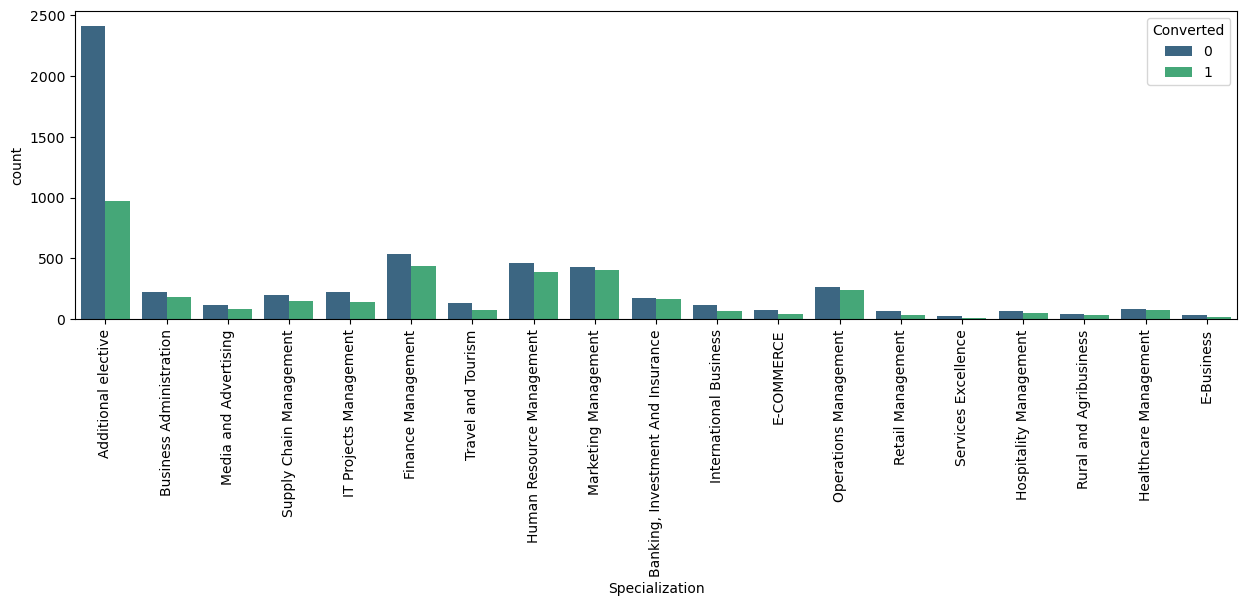

In [57]:
#Specialization
plt.figure(figsize=(15,4))
sns.countplot(x="Specialization",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• less conversion rate is seen Financial management, Human Resource Management, Marketing management,Operation management

### 8. What is your current occupation

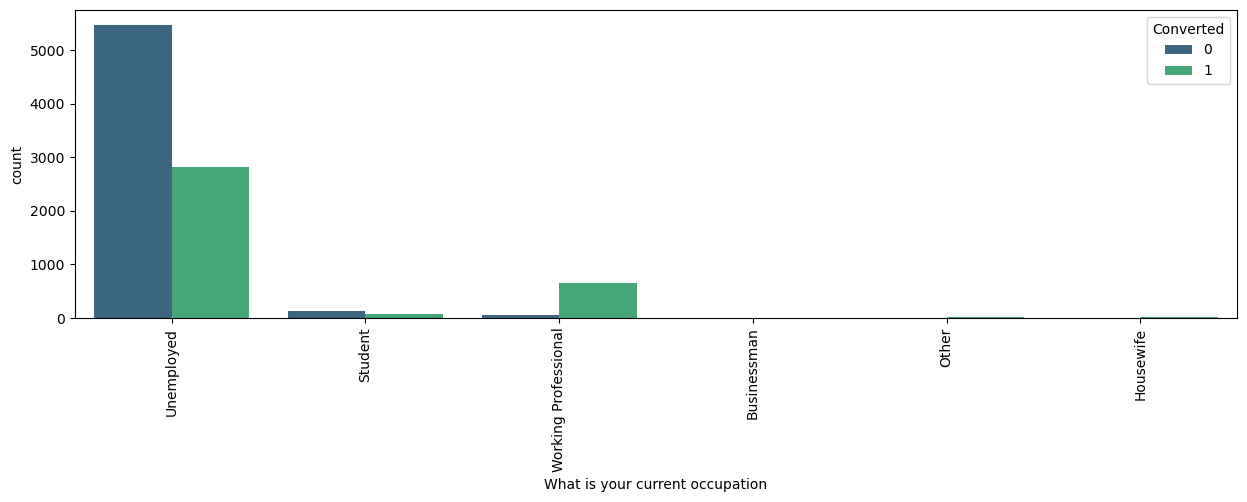

In [58]:
#What is your current occupation
plt.figure(figsize=(15,4))
sns.countplot(x="What is your current occupation",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• Higher lead conversion rate is seen unemployed and working professional

Since the column name is little bit lenghty, it might be renamed

In [59]:
#renaming the column as current_occupation
lead_df.rename(columns={"What is your current occupation":"current_occupation"},inplace=True)

### 9. Search

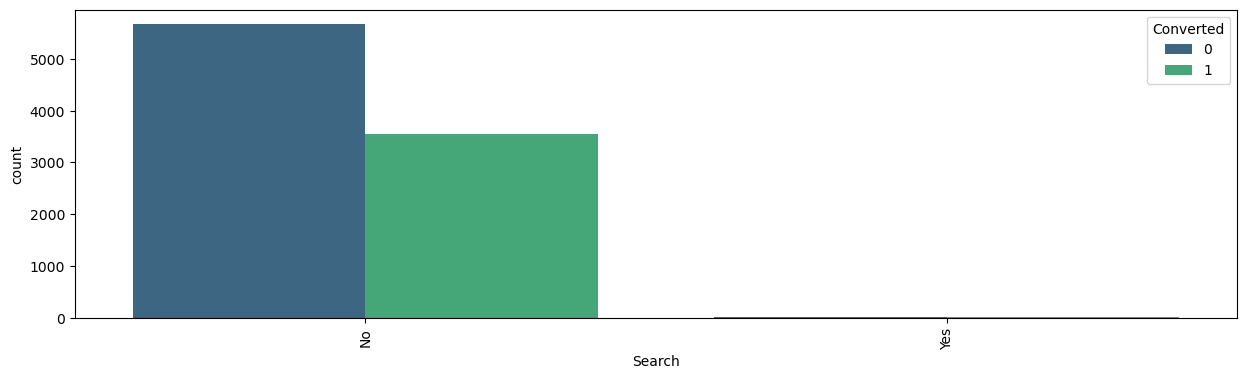

In [60]:
#Search
plt.figure(figsize=(15,4))
sns.countplot(x="Search",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• This indicates that the customer has not seen any ads through "Search"

### 10. Newspaper Article

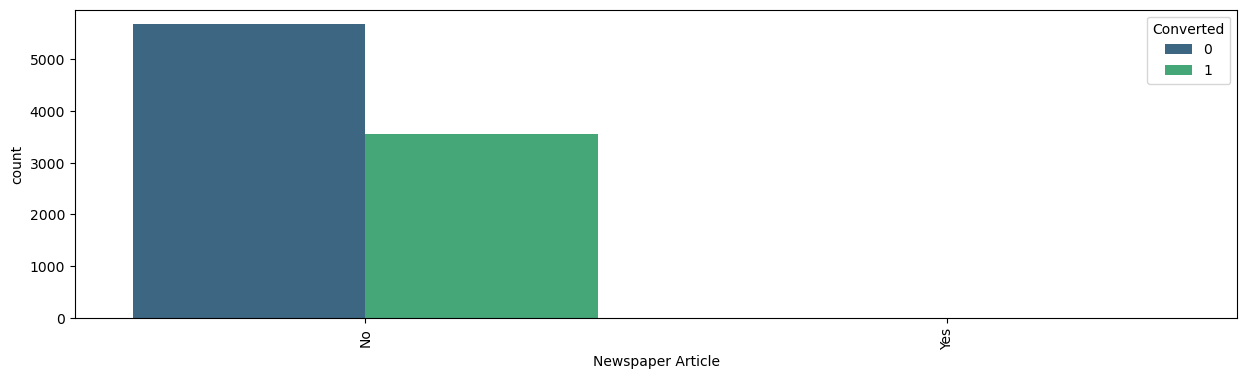

In [61]:
#Newspaper Article
plt.figure(figsize=(15,4))
sns.countplot(x="Newspaper Article",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• This indicates that the customer has not seen any ads through "Newspaper Article"

### 11. X Education Forums

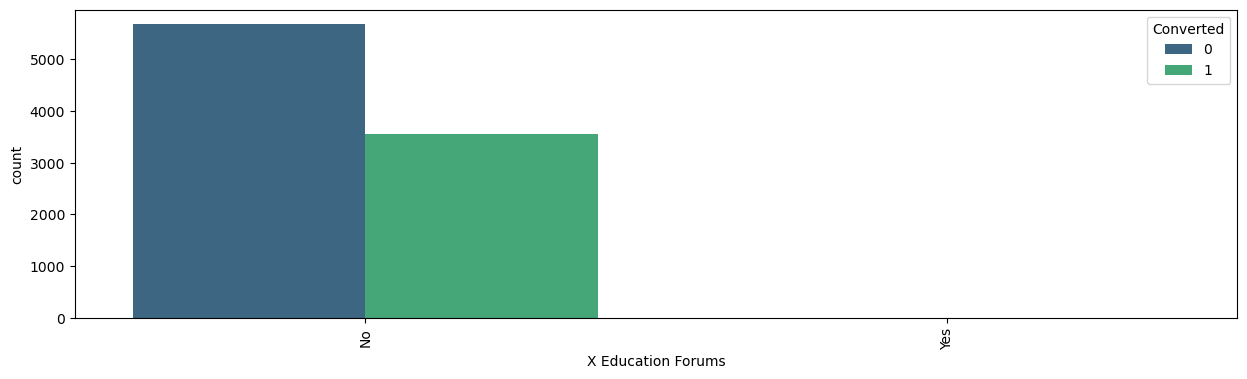

In [62]:
#X Education Forums
plt.figure(figsize=(15,4))
sns.countplot(x="X Education Forums",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• This indicates that the customer has not seen any ads through "X Education Forums"

### 12. Newspaper

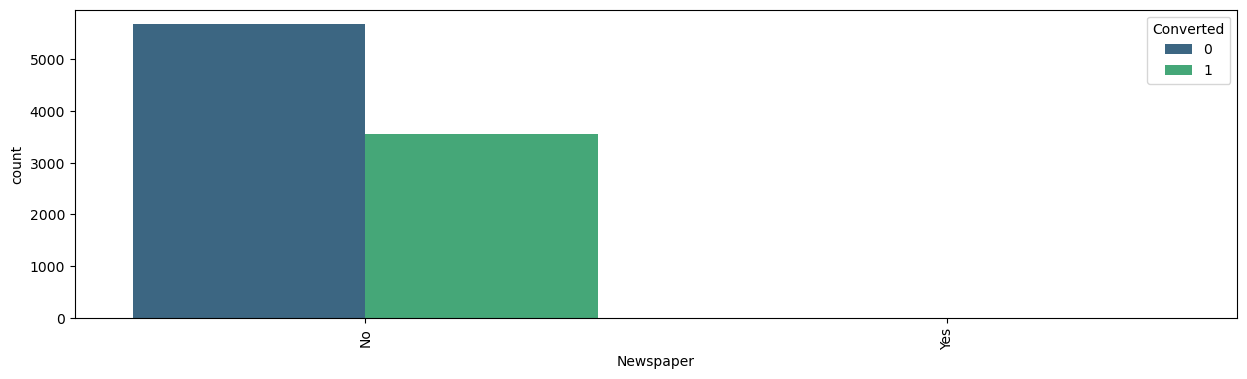

In [63]:
#Newspaper
plt.figure(figsize=(15,4))
sns.countplot(x="Newspaper",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• This indicates that the customer has not seen any ads through "Newspaper"

### 13. Digital Advertisement

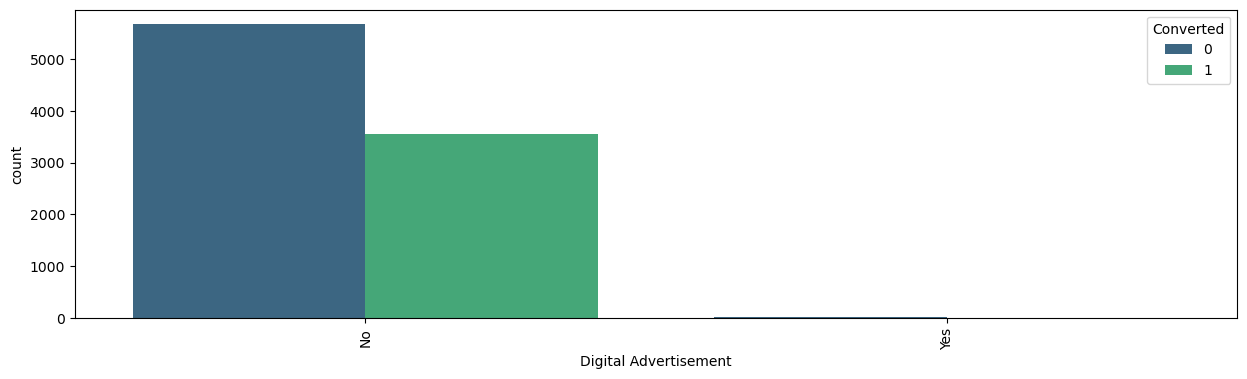

In [64]:
#Digital Advertisement
plt.figure(figsize=(15,4))
sns.countplot(x="Digital Advertisement",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• This indicates that the customer has not seen any ads through "Digital Advertisement"

### 14. Through Recommendations

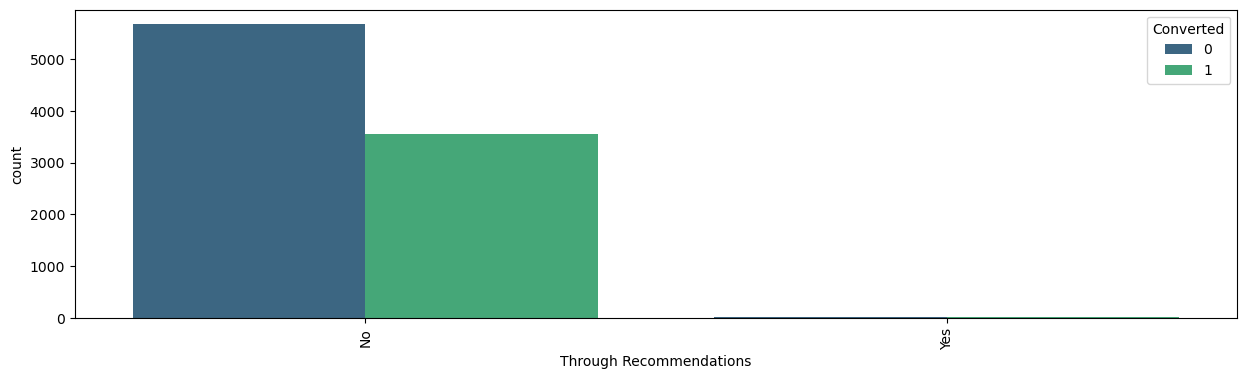

In [65]:
#Through Recommendations
plt.figure(figsize=(15,4))
sns.countplot(x="Through Recommendations",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• This indicates that the customer has not seen any ads "Through Recommendations"

### 15. Tags

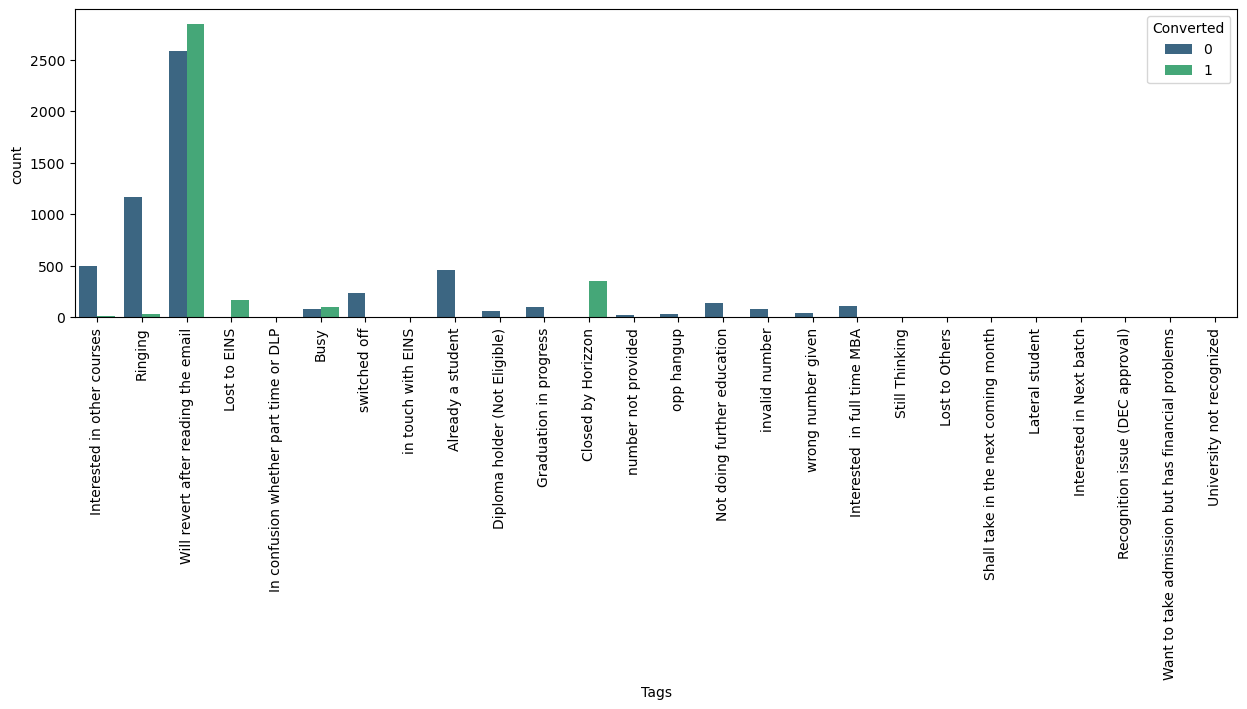

In [66]:
#Tags
plt.figure(figsize=(15,4))
sns.countplot(x="Tags",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• Tags (assigned to customers) indicates the current status of the lead. Status are not needed for modeling.

### 16.City

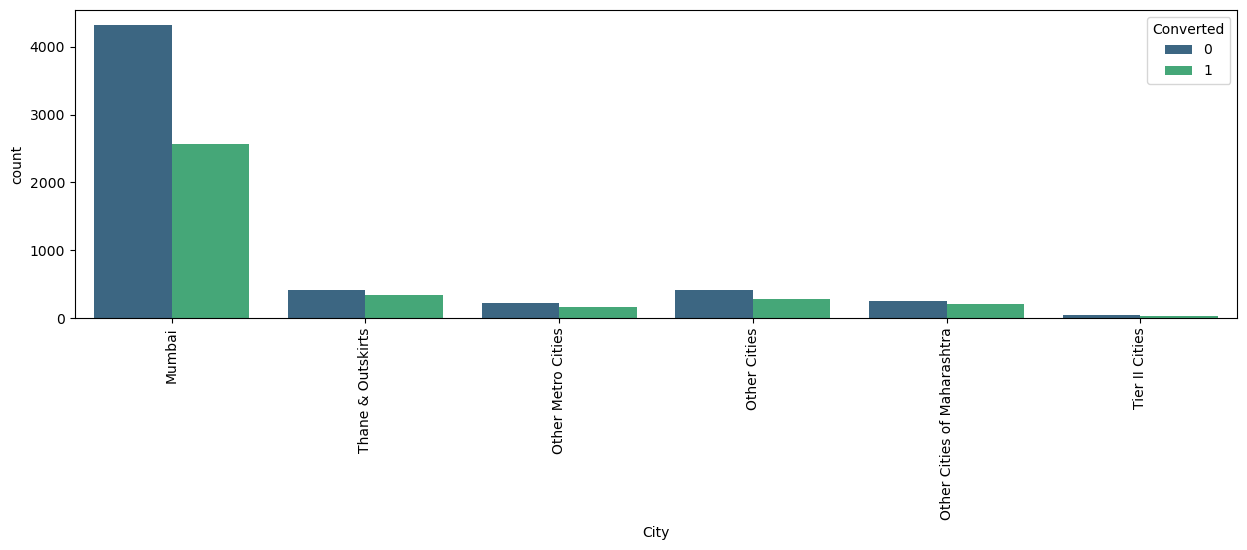

In [67]:
#City
plt.figure(figsize=(15,4))
sns.countplot(x="City",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

• More lead conversion rate is seen in the mumbai city.

### 17. A free copy of Mastering The Interview

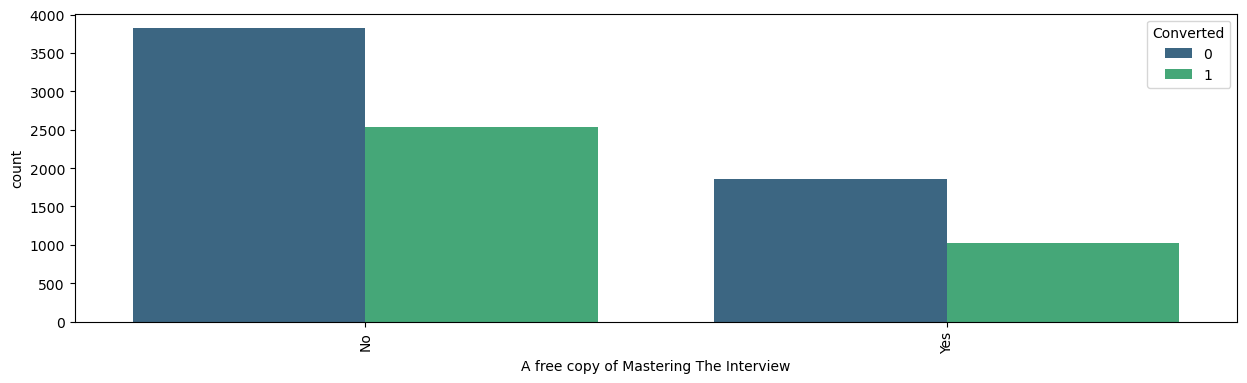

In [68]:
#A free copy of Mastering The Interview
plt.figure(figsize=(15,4))
sns.countplot(x="A free copy of Mastering The Interview",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

In [69]:
#renaming the column as free_copy_for_interview
lead_df.rename(columns={"A free copy of Mastering The Interview":"free_copy_for_interview"},inplace=True)

### 18. Last Notable Activity

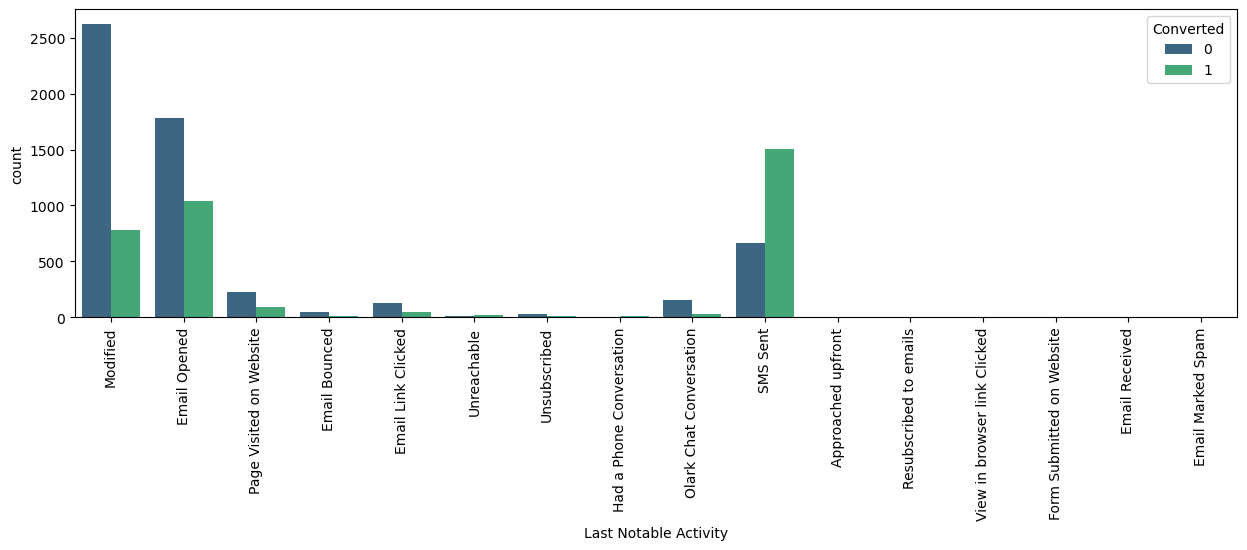

In [70]:
#Last Notable Activity
plt.figure(figsize=(15,4))
sns.countplot(x="Last Notable Activity",hue="Converted",data=lead_df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

From the above categorical Analysis, few columns does not give information. So, those few columns can be dropped.

In [71]:
#dropping columns
lead_df=lead_df.drop(["Do Not Call","Country","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Tags","City","Last Notable Activity"],axis=1)


In [72]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_occupation,free_copy_for_interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Additional elective,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Additional elective,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Additional elective,Unemployed,No


### Numerical columns

### 1. TotalVisits

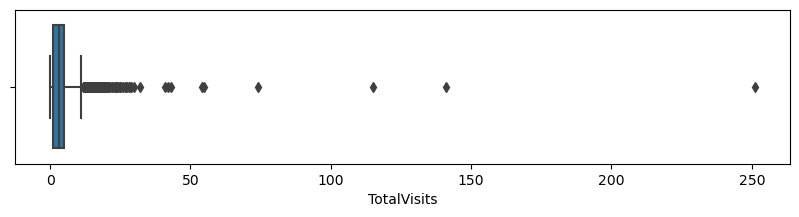

In [73]:
#Checking boxplot of TotalVisits
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_df["TotalVisits"])
plt.show()

In [74]:
#Before capping
lead_df["TotalVisits"].describe(percentiles=[.10,.25,.5,.75,.95])

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [75]:
#Capping to 95%
percentiles=lead_df["TotalVisits"].quantile([0.05,0.95]).values
lead_df["TotalVisits"][lead_df["TotalVisits"]<=percentiles[0]]=percentiles[0]
lead_df["TotalVisits"][lead_df["TotalVisits"]>=percentiles[1]]=percentiles[1]

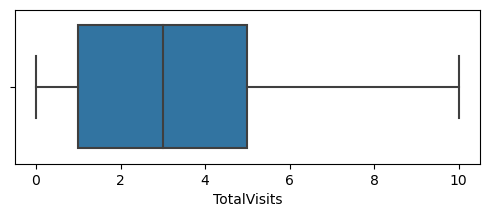

In [76]:
#Checking the plot
plt.figure(figsize=(6,2))
sns.boxplot(x=lead_df["TotalVisits"])
plt.show()

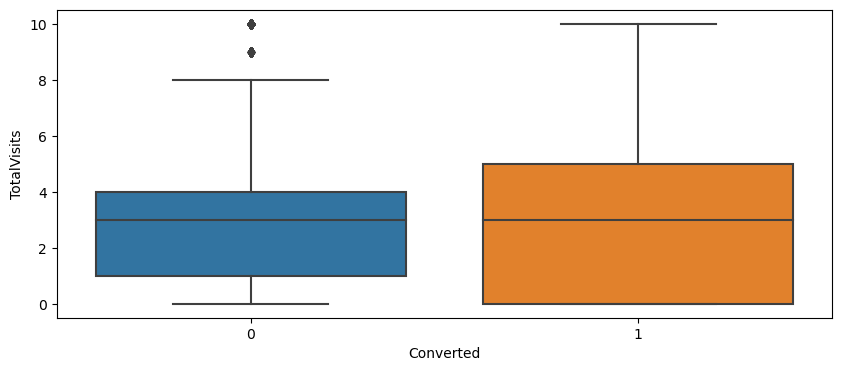

In [77]:
#Univariate Analysis for Totalvisits Vs Converted
plt.figure(figsize=(10,4))
sns.boxplot(x="Converted",y="TotalVisits",data=lead_df)
plt.show()

### 2. Total Time Spent on Website

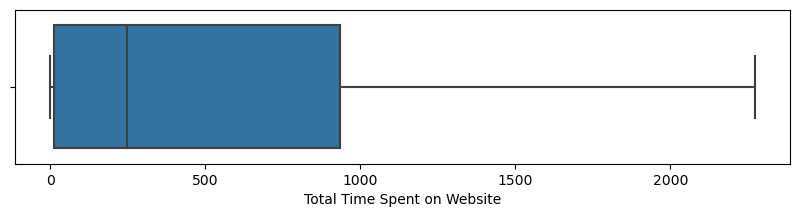

In [78]:
#Checking boxplot of TotalVisits
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_df["Total Time Spent on Website"])
plt.show()

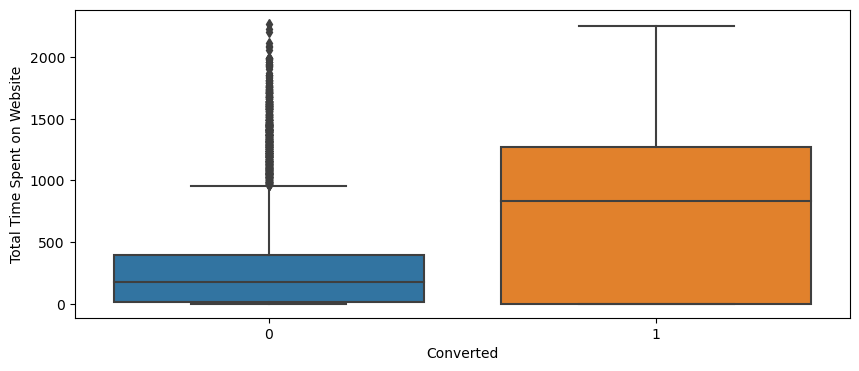

In [79]:
#Univariate Analysis for Total Time Spent on Website Vs Converted
plt.figure(figsize=(10,4))
sns.boxplot(x="Converted",y="Total Time Spent on Website",data=lead_df)
plt.show()

### 3. Page Views Per Visit

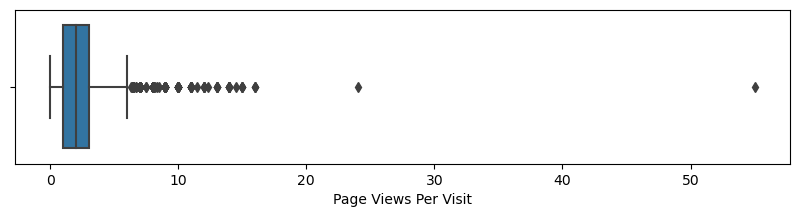

In [80]:
#Checking boxplot of TotalVisits
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_df["Page Views Per Visit"])
plt.show()

In [81]:
#Capping to 95%
percentiles=lead_df["Page Views Per Visit"].quantile([0.05,0.95]).values
lead_df["Page Views Per Visit"][lead_df["Page Views Per Visit"]<=percentiles[0]]=percentiles[0]
lead_df["Page Views Per Visit"][lead_df["Page Views Per Visit"]>=percentiles[1]]=percentiles[1]

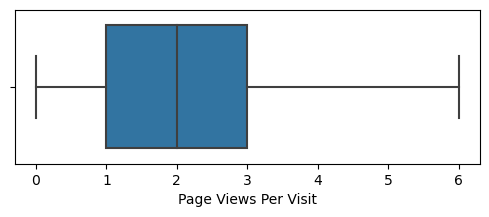

In [82]:
#Checking the plot
plt.figure(figsize=(6,2))
sns.boxplot(x=lead_df["Page Views Per Visit"])
plt.show()

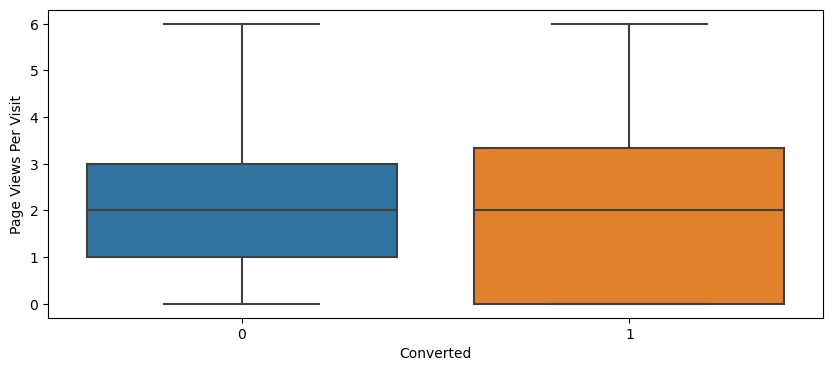

In [83]:
#Univariate Analysis for Page Views Per Visit Vs Converted
plt.figure(figsize=(10,4))
sns.boxplot(x="Converted",y="Page Views Per Visit",data=lead_df)
plt.show()

### 3. Bivariate Analysis for numerical variables

In [84]:
#Numerical columns
cols_numer=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

<Figure size 1600x400 with 0 Axes>

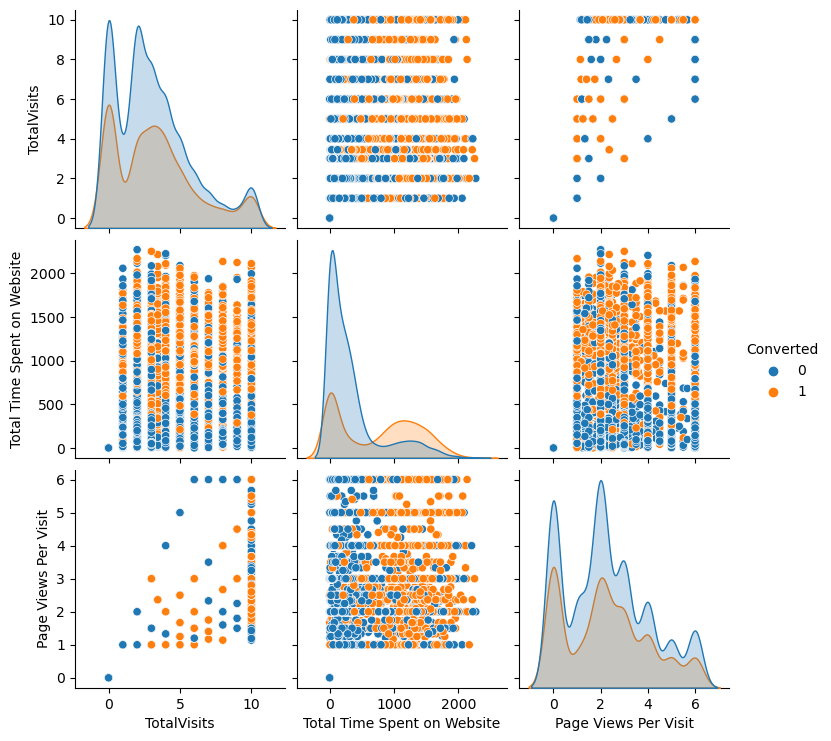

In [85]:
#pairplot
plt.figure(figsize=(16,4))
sns.pairplot(data=lead_df,vars=cols_numer,hue="Converted")
plt.show()

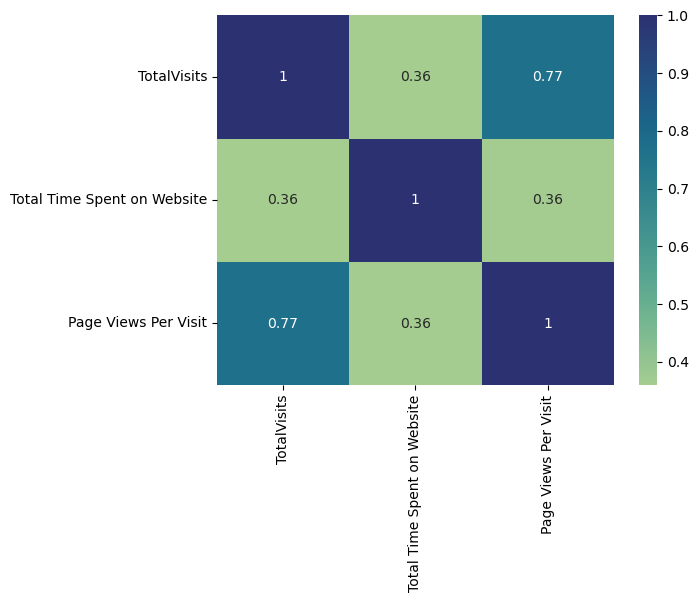

In [86]:
#Heatmap to show the correlation between numerical variables
sns.heatmap(data=lead_df[cols_numer].corr(),cmap="crest",annot=True)
plt.show()

## 4. Data Preparation

In [87]:
#Checking the columns
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'current_occupation',
       'free_copy_for_interview'],
      dtype='object')

From the above columns, it is clear that "Do Not Email" and "free_copy_for_interview" are Yes/No categorical variables.
This binary categorical variables should be mapped with 0/1.

### Mapping of binary categorical variables

In [88]:
#Converting yes/no categorical variable to 0/1 variable
lead_df["Do Not Email"]=lead_df["Do Not Email"].apply(lambda x:1 if x=="Yes" else 0)
lead_df["free_copy_for_interview"]=lead_df["free_copy_for_interview"].apply(lambda x:1 if x=="Yes" else 0)

In [89]:
#Checking the values of the columns "Do Not Email",free_copy_for_interview"
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_occupation,free_copy_for_interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Additional elective,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Additional elective,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Additional elective,Unemployed,0


### Checking the datatypes of columns

In [90]:
#datatypes of each columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   current_occupation           9240 non-null   object 
 10  free_copy_for_interview      9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


The datatypes of every columns are in proper format.

### Creation of dummy variables

In [91]:
#creating dummy variables for the rest of the categorical columns
dummy=pd.get_dummies(lead_df[['Lead Origin', 'Lead Source',  'Last Activity', 'Specialization', 'current_occupation']],drop_first=True)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9238,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
#merge dummy dataframe and original dataframe
lead_df=pd.concat([dummy,lead_df],axis=1)
lead_df

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_occupation,free_copy_for_interview
0,0,0,0,0,0,0,1,0,0,0,...,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Additional elective,Unemployed,0
1,0,0,0,0,0,0,0,1,0,0,...,Organic Search,0,0,5.0,674,2.50,Email Opened,Additional elective,Unemployed,0
2,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,1
3,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0
4,1,0,0,0,0,1,0,0,0,0,...,Google,0,1,2.0,1428,1.00,Converted to Lead,Additional elective,Unemployed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,1,1,8.0,1845,2.67,Others,IT Projects Management,Unemployed,0
9236,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,1
9237,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,1
9238,1,0,0,0,0,1,0,0,0,0,...,Google,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,0


In [93]:
#drop the columns for dummies created
lead_df=lead_df.drop(['Lead Origin', 'Lead Source',  'Last Activity', 'Specialization', 'current_occupation'],axis=1)
lead_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,free_copy_for_interview
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,2.0,1428,1.0,0


## 5. Splitting of Train and Test set

In [94]:
#Checking the datatypes of all columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Origin_Landing Page Submission               9240 non-null   uint8  
 1   Lead Origin_Lead Add Form                         9240 non-null   uint8  
 2   Lead Origin_Lead Import                           9240 non-null   uint8  
 3   Lead Origin_Quick Add Form                        9240 non-null   uint8  
 4   Lead Source_Facebook                              9240 non-null   uint8  
 5   Lead Source_Google                                9240 non-null   uint8  
 6   Lead Source_Olark Chat                            9240 non-null   uint8  
 7   Lead Source_Organic Search                        9240 non-null   uint8  
 8   Lead Source_Others                                9240 non-null   uint8  
 9   Lead Source_Referen

In [95]:
#Checking the size of the dataframe
lead_df.shape

(9240, 52)

In [96]:
#importing library for train-test-split
from sklearn.model_selection import train_test_split

In [97]:
#assigning predictor variable for X
X=lead_df.drop(["Converted"],axis=1)
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,free_copy_for_interview
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,2.0,1428,1.0,0


In [98]:
#Assigning target variable for y
y=lead_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
#Splitting dataset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [100]:
#check the size of the sets
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (6468, 51)
y_train: (6468,)
X_test: (2772, 51)
y_test: (2772,)


## 6. Scaling of features

In [101]:
#importing library for standardscaler
from sklearn.preprocessing import StandardScaler


In [102]:
#Standard scaler - for scaling the features
scaler=StandardScaler()
#fetching numeric columns
num_cols=X_train.select_dtypes(include=["float64","int64"]).columns
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])


In [103]:
#checking the values of X_train
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,free_copy_for_interview
1871,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,-0.291638,-1.152121,-0.885371,-1.269958,-0.673169
6795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.291638,0.297240,0.005716,-0.519633,1.485511
3516,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,-0.291638,0.659580,-0.691418,0.140427,-0.673169
8105,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,-0.291638,0.659580,1.365219,1.550812,-0.673169
3934,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,-0.291638,-1.152121,-0.885371,-1.269958,-0.673169


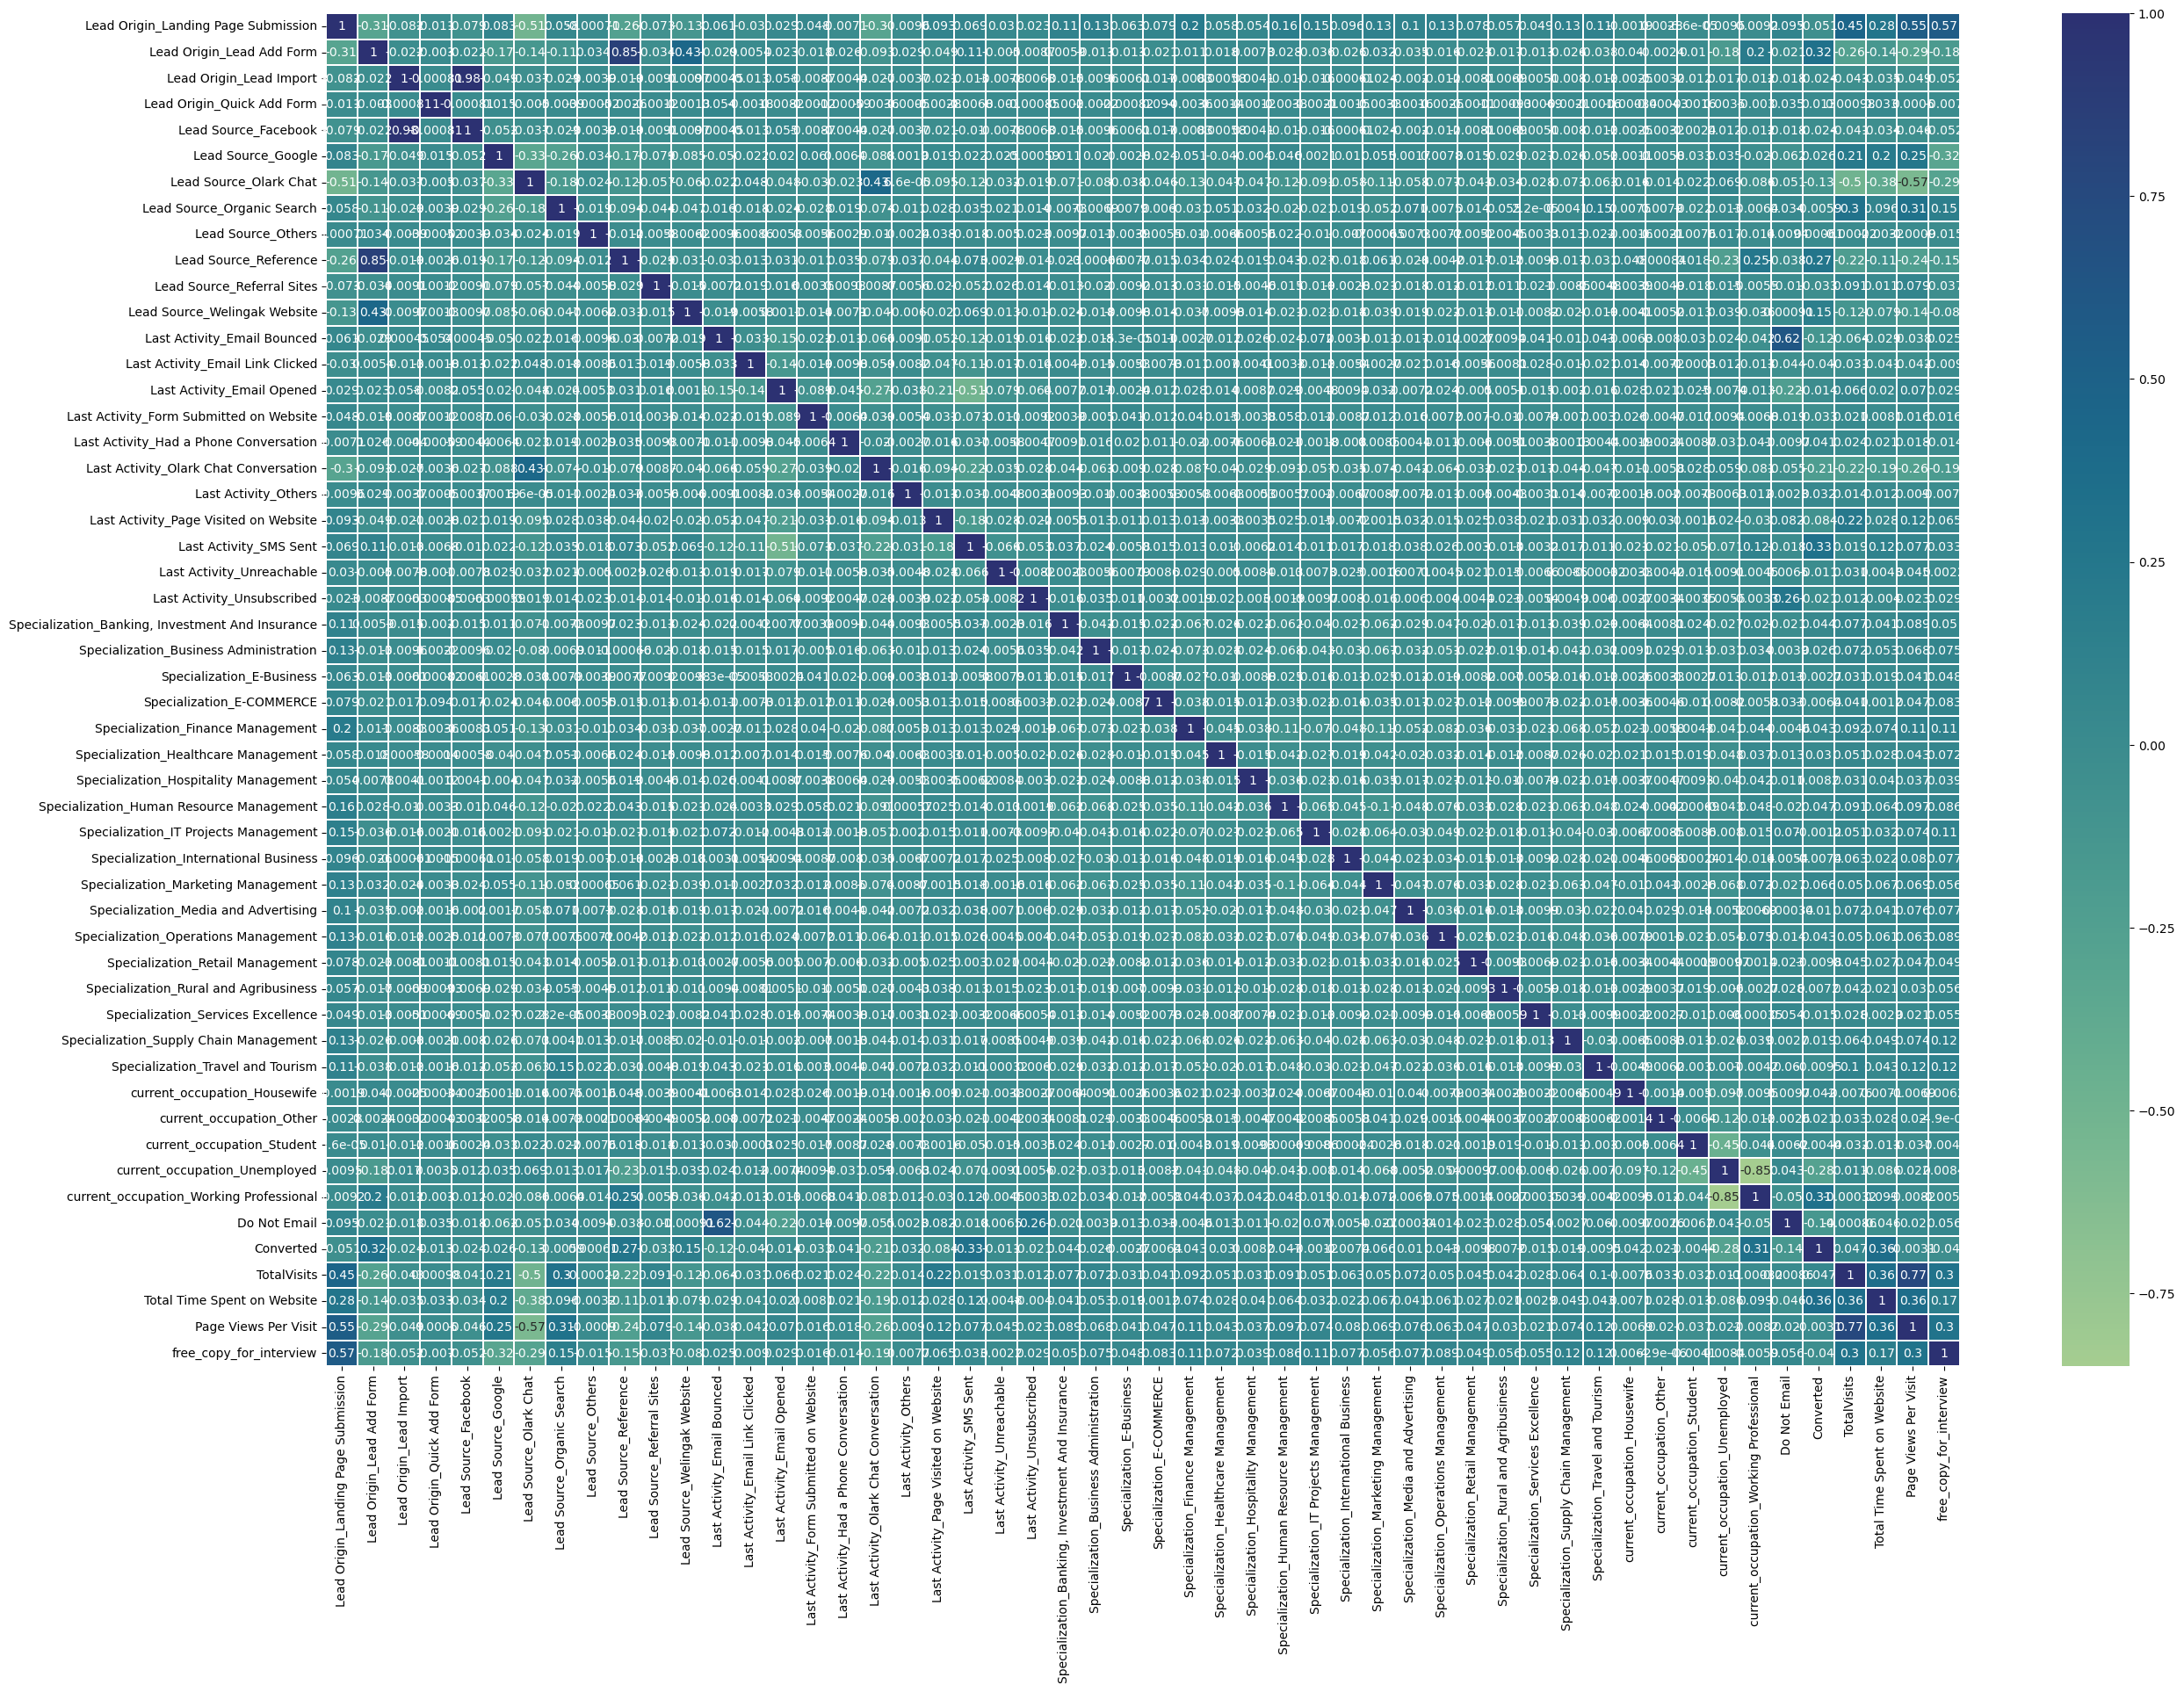

In [104]:
#plotting the correlations among the variables
plt.figure(figsize=(30,20))
sns.heatmap(lead_df.corr(),linewidths=0.01,cmap="crest",annot=True)
plt.show()

• Since the number of variable is high its better to look at the table. and it is very difficult to drop particular features. Lets do the model building.

## 7. Model Building Using Statsmodel and RFE

we build logistic regression model and the features are selected by using RFE

In [105]:
# import python library for statsmodel, RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [106]:
#running RFE with 15 variables as output
logregr=LogisticRegression()
rfe=RFE(logregr,n_features_to_select=15)

In [107]:
#fit the model
rfe=rfe.fit(X_train,y_train)

In [108]:
#Features with rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 16),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed'

In [109]:
col=X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness', 'current_occupation_Housewife',
       'current_occupation_Working Professional',
       'Total Time Spent on Website'],
      dtype='object')

In [110]:
#features not taken into consideration
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Re

In [111]:
# Creating X_test dataframe with RFE selected variables:-
X_train_rfe = X_train[col]

### Model-1

In [112]:
#Adding a constant variable
X_train_sm=sm.add_constant(X_train[col])
#Fitting the model
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
#Summary
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.8
Date:                Mon, 20 May 2024   Deviance:                       5531.6
Time:                        15:55:28   Pearson chi2:                 9.12e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3776
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.4808      0.087    -28.582      0.000      -2.651      -2.311
Lead Origin_Lead Add Form                            3.5856      0.188     19.114      0.000       3.218       3.953
Lead Source_Olark Chat                               1.1633      0.099     11.693      0.000       0.968       1.358
Lead Source_Welingak Website                         2.0521      0.745      2.756      0.006       0.593       3.511
Last Activity_Email Opened                           1.1068      0.092     12.026      0.000       0.926       1.287
Last Activity_Had a Phone Conversation               3.1482      0.653      4.820      0.000       1.868       4.428
Last Activity_Others                                 2.0100      0.681      2.953      0.003       0.676       3.344
Last Activity_SMS Sent                               2.1418      0.096     22.362      0.000       1.954       2.330
Last Activity_Unreachable                            1.1203      0.354      3.162      0.002       0.426       1.815
Specialization_Banking, Investment And Insurance     0.3796      0.180      2.112      0.035       0.027       0.732
Specialization_Finance Management                    0.3342      0.110      3.048      0.002       0.119       0.549
Specialization_IT Projects Management                0.3333      0.180      1.854      0.064      -0.019       0.686
Specialization_Rural and Agribusiness                0.8201      0.376      2.183      0.029       0.084       1.556
current_occupation_Housewife                        23.1288   1.34e+04      0.002      0.999   -2.63e+04    2.63e+04
current_occupation_Working Professional              2.8509      0.186     15.295      0.000       2.486       3.216
Total Time Spent on Website                          1.0997      0.039     28.244      0.000       1.023       1.176
====================================================================================================================
"""

The value of P in "current_occupation_Housewife" is 0.999 which is >0.05, so it should be dropped.

#### VIF(Variance Inflation factor) check for detecting multicollinearity

In [113]:
#import VIF from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [114]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,1.47
1,Lead Source_Olark Chat,1.30
6,Last Activity_SMS Sent,1.27
3,Last Activity_Email Opened,1.25
2,Lead Source_Welingak Website,1.24
14,Total Time Spent on Website,1.24
13,current_occupation_Working Professional,1.18
9,Specialization_Finance Management,1.12
8,"Specialization_Banking, Investment And Insurance",1.04
10,Specialization_IT Projects Management,1.04


In [115]:
#Dropping of "current_occupation_Housewife"
X_train_new = X_train_rfe.drop(["current_occupation_Housewife"],axis=1)

In [116]:
#Checking the column is dropped or not
X_train_new.columns

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness',
       'current_occupation_Working Professional',
       'Total Time Spent on Website'],
      dtype='object')

### Model-2

In [117]:
#Adding a constant variable
X_train_sm2=sm.add_constant(X_train_new)
#Fitting the model
logm2=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial()).fit()
#Summary
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.8
Date:                Mon, 20 May 2024   Deviance:                       5547.6
Time:                        15:55:28   Pearson chi2:                 9.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3760
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.4709      0.087    -28.559      0.000      -2.641      -2.301
Lead Origin_Lead Add Form                            3.6041      0.187     19.246      0.000       3.237       3.971
Lead Source_Olark Chat                               1.1552      0.099     11.630      0.000       0.961       1.350
Lead Source_Welingak Website                         2.0257      0.744      2.721      0.007       0.567       3.485
Last Activity_Email Opened                           1.1063      0.092     12.054      0.000       0.926       1.286
Last Activity_Had a Phone Conversation               3.1392      0.653      4.807      0.000       1.859       4.419
Last Activity_Others                                 2.0025      0.681      2.943      0.003       0.669       3.336
Last Activity_SMS Sent                               2.1332      0.096     22.321      0.000       1.946       2.321
Last Activity_Unreachable                            1.1103      0.354      3.135      0.002       0.416       1.805
Specialization_Banking, Investment And Insurance     0.3742      0.180      2.083      0.037       0.022       0.726
Specialization_Finance Management                    0.3362      0.109      3.077      0.002       0.122       0.550
Specialization_IT Projects Management                0.3277      0.180      1.824      0.068      -0.024       0.680
Specialization_Rural and Agribusiness                0.8134      0.375      2.167      0.030       0.078       1.549
current_occupation_Working Professional              2.8439      0.186     15.263      0.000       2.479       3.209
Total Time Spent on Website                          1.0983      0.039     28.251      0.000       1.022       1.175
====================================================================================================================
"""

In [118]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,1.46
1,Lead Source_Olark Chat,1.30
6,Last Activity_SMS Sent,1.27
3,Last Activity_Email Opened,1.25
2,Lead Source_Welingak Website,1.24
13,Total Time Spent on Website,1.24
12,current_occupation_Working Professional,1.18
9,Specialization_Finance Management,1.12
8,"Specialization_Banking, Investment And Insurance",1.04
10,Specialization_IT Projects Management,1.04


In [119]:
#Dropping of "Specialization_IT Projects Management"
X_train_new=X_train_new.drop(["Specialization_IT Projects Management"],axis=1)

In [120]:
#to check the column is removed
X_train_new.columns

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_Rural and Agribusiness',
       'current_occupation_Working Professional',
       'Total Time Spent on Website'],
      dtype='object')

### Model-3

In [121]:
#Adding a constant variable
X_train_sm3=sm.add_constant(X_train_new)
#Fitting the model
logm3=sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial()).fit()
#Summary
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2775.4
Date:                Mon, 20 May 2024   Deviance:                       5550.8
Time:                        15:55:28   Pearson chi2:                 9.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.4512      0.086    -28.597      0.000      -2.619      -2.283
Lead Origin_Lead Add Form                            3.5876      0.187     19.190      0.000       3.221       3.954
Lead Source_Olark Chat                               1.1358      0.099     11.517      0.000       0.942       1.329
Lead Source_Welingak Website                         2.0214      0.744      2.715      0.007       0.562       3.481
Last Activity_Email Opened                           1.1056      0.092     12.045      0.000       0.926       1.286
Last Activity_Had a Phone Conversation               3.1251      0.653      4.789      0.000       1.846       4.404
Last Activity_Others                                 2.0049      0.678      2.957      0.003       0.676       3.334
Last Activity_SMS Sent                               2.1331      0.096     22.323      0.000       1.946       2.320
Last Activity_Unreachable                            1.1138      0.353      3.151      0.002       0.421       1.807
Specialization_Banking, Investment And Insurance     0.3572      0.179      1.992      0.046       0.006       0.709
Specialization_Finance Management                    0.3188      0.109      2.931      0.003       0.106       0.532
Specialization_Rural and Agribusiness                0.7966      0.375      2.124      0.034       0.061       1.532
current_occupation_Working Professional              2.8408      0.186     15.269      0.000       2.476       3.205
Total Time Spent on Website                          1.0963      0.039     28.239      0.000       1.020       1.172
====================================================================================================================
"""

The P value of "Specialization_Banking, Investment And Insurance" is 0.046 which is ~0.05, sp this feature can be removed.

In [122]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,1.46
1,Lead Source_Olark Chat,1.29
6,Last Activity_SMS Sent,1.25
2,Lead Source_Welingak Website,1.24
12,Total Time Spent on Website,1.24
3,Last Activity_Email Opened,1.23
11,current_occupation_Working Professional,1.18
9,Specialization_Finance Management,1.12
8,"Specialization_Banking, Investment And Insurance",1.04
4,Last Activity_Had a Phone Conversation,1.01


In [123]:
#Dropping of "Specialization_Banking, Investment And Insurance"
X_train_new=X_train_new.drop(["Specialization_Banking, Investment And Insurance"],axis=1)

### Model-4

In [124]:
#Adding a constant variable
X_train_sm4=sm.add_constant(X_train_new)
#Fitting the model
logm4=sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial()).fit()
#Summary
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.4
Date:                Mon, 20 May 2024   Deviance:                       5554.8
Time:                        15:55:29   Pearson chi2:                 9.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3753
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.4378      0.085    -28.552      0.000      -2.605      -2.270
Lead Origin_Lead Add Form                   3.5840      0.187     19.178      0.000       3.218       3.950
Lead Source_Olark Chat                      1.1231      0.098     11.427      0.000       0.930       1.316
Lead Source_Welingak Website                2.0080      0.744      2.697      0.007       0.549       3.467
Last Activity_Email Opened                  1.1104      0.092     12.104      0.000       0.931       1.290
Last Activity_Had a Phone Conversation      3.1869      0.658      4.843      0.000       1.897       4.477
Last Activity_Others                        1.9996      0.679      2.947      0.003       0.670       3.330
Last Activity_SMS Sent                      2.1391      0.096     22.393      0.000       1.952       2.326
Last Activity_Unreachable                   1.1200      0.354      3.167      0.002       0.427       1.813
Specialization_Finance Management           0.3017      0.108      2.784      0.005       0.089       0.514
Specialization_Rural and Agribusiness       0.7806      0.375      2.081      0.037       0.046       1.516
current_occupation_Working Professional     2.8387      0.186     15.260      0.000       2.474       3.203
Total Time Spent on Website                 1.0965      0.039     28.260      0.000       1.020       1.173
===========================================================================================================
"""

In [125]:
# Calculation of VIF
vif=pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,1.46
1,Lead Source_Olark Chat,1.29
2,Lead Source_Welingak Website,1.24
11,Total Time Spent on Website,1.24
6,Last Activity_SMS Sent,1.23
3,Last Activity_Email Opened,1.21
10,current_occupation_Working Professional,1.18
8,Specialization_Finance Management,1.11
4,Last Activity_Had a Phone Conversation,1.01
7,Last Activity_Unreachable,1.01


Here, all the P values are less than 0.05 and the value of VIF are also less than 3. This model can be fixed as final model.

## 8. Model Evaluation for Train set

In [126]:
#obtaining predicted value on y_train set
y_train_pred=logm4.predict(X_train_sm4)
#Displaying 10 values
y_train_pred[:10]

1871    0.235935
6795    0.210631
3516    0.276393
8105    0.768209
3934    0.235935
4844    0.989876
3297    0.206347
8071    0.998978
987     0.145113
7423    0.866034
dtype: float64

In [127]:
#reshaping into an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23593507, 0.2106306 , 0.27639335, 0.76820922, 0.23593507,
       0.98987576, 0.20634668, 0.99897813, 0.14511255, 0.86603443])

In [128]:
#Creating a dataframe with the actual converted flag and predicted probabilities 
y_train_pred_final=pd.DataFrame({'Converted': y_train.values,"Converted_prob":y_train_pred})
#Adding column "Prospect ID" for indexing
y_train_pred_final["Prospect ID"] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.235935,1871
1,0,0.210631,6795
2,0,0.276393,3516
3,0,0.768209,8105
4,0,0.235935,3934
5,1,0.989876,4844
6,0,0.206347,3297
7,1,0.998978,8071
8,0,0.145113,987
9,1,0.866034,7423


In [129]:
#Creating a threshold value for the new column "predicted".if converted_prob >0.5, predicted value is 1, if not 0
y_train_pred_final["Predicted"]=y_train_pred_final["Converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.235935,1871,0
1,0,0.210631,6795,0
2,0,0.276393,3516,0
3,0,0.768209,8105,1
4,0,0.235935,3934,0
...,...,...,...,...
6463,1,0.783424,350,1
6464,1,0.996085,79,1
6465,1,0.235935,8039,0
6466,0,0.050636,6936,0


#### Creating Confusion matrix

In [130]:
#importing library
from sklearn import metrics

In [131]:
#confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3585  417]
 [ 861 1605]]


#### Accuracy

In [132]:
#obtaining accuracy
print(100*(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)))

80.24118738404454


In [133]:
#Checking other metrics
#True positive
TP=confusion[1,1]
#True negative
TN=confusion[0,0]
#False positive
FP=confusion[0,1]
#False negative
FN=confusion[1,0]

In [134]:
#Sensitivity
print("Sensitivity:",(TP / float(TP+FN)))
#Specificity
print("Specificity:",(TN / float(TN+FP)))
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False positive Rate:",FP/float(TN+FP))
# positive predictive value
print("Positive Predictive Value:",TP/float(TP+FP))
# Negative predictive value
print("Negative Predctive Value:" ,TN/float(TN+FN))
# Precision
print("Precision",confusion[1,1]/(confusion[0,1]+confusion[1,1]))
# Recall
print("Recall",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Sensitivity: 0.6508515815085159
Specificity: 0.8958020989505248
False positive Rate: 0.10419790104947527
Positive Predictive Value: 0.7937685459940653
Negative Predctive Value: 0.8063427800269906
Precision 0.7937685459940653
Recall 0.6508515815085159


The sensitivity value obtained is 65.08% and this is due to the threshold or cut-off value (0.5) is randomly chosen

Inorder to improve the sensitivity value, optimised cut-off value to be selected with the help of ROC curve.

### Plotting the RoC curve

An ROC curve demonstrates 

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

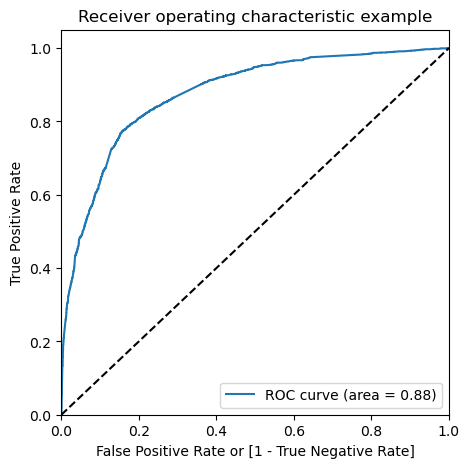

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Area under RoC curve is 0.88 which says that it is a good predictive model

### Determining optimal cut-off point or probability

optimal cut-off point or probability - The probability where balanced sensitivity and specificity is obtained.

In [138]:
#creating columns with different probability cut-off's
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235935,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.210631,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.276393,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768209,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.235935,3934,0,1,1,1,0,0,0,0,0,0,0


In [139]:
# calculation of accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.603278  0.966748  0.379310
0.2   0.2  0.719697  0.918086  0.597451
0.3   0.3  0.795609  0.824006  0.778111
0.4   0.4  0.815553  0.760341  0.849575
0.5   0.5  0.802412  0.650852  0.895802
0.6   0.6  0.789270  0.579075  0.918791
0.7   0.7  0.775510  0.502433  0.943778
0.8   0.8  0.746289  0.384023  0.969515
0.9   0.9  0.711967  0.263179  0.988506


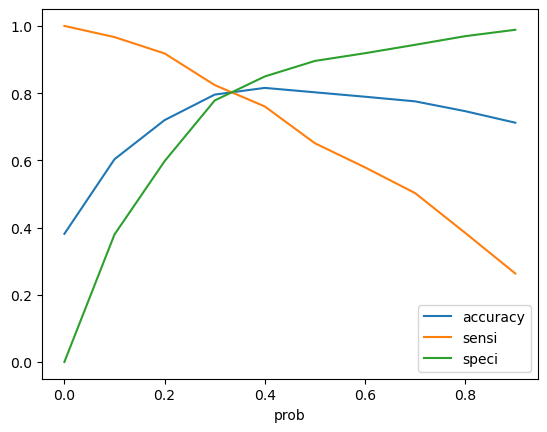

In [140]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x="prob",y=["accuracy","sensi","speci"])
plt.show()

The intersection points (optimal point) is approximately 0.35, so 0.35 is taken as cut-off point or cut-off probability

In [141]:
#For optimal probability 0.35
y_train_pred_final["final_Predicted"]=y_train_pred_final["Converted_prob"].map(lambda x:1 if x>0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.235935,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.210631,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.276393,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.768209,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.235935,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [142]:
# removing unwanted columns
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis=1,inplace=True)
#y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_Predicted
0,0,0.235935,1871,0
1,0,0.210631,6795,0
2,0,0.276393,3516,0
3,0,0.768209,8105,1
4,0,0.235935,3934,0


In [143]:
#Adding Lead_Score with the training data
y_train_pred_final["Lead_Score"] = y_train_pred_final.Converted_prob.map(lambda x:round(x*100))
#y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.235935,1871,0,24
1,0,0.210631,6795,0,21
2,0,0.276393,3516,0,28
3,0,0.768209,8105,1,77
4,0,0.235935,3934,0,24


### Model evaluation after obtaining optimal cut-off point or probability

In [144]:
#obtaining accuracy
print("Accuracy:", 100*(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_Predicted)))

Accuracy: 80.93692022263451


In [145]:
#confusion matrix
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_Predicted)
print(confusion2)

[[3281  721]
 [ 512 1954]]


In [146]:
#Checking other metrics
#True positive
TP=confusion2[1,1]
#True negative
TN=confusion2[0,0]
#False positive
FP=confusion2[0,1]
#False negative
FN=confusion2[1,0]

In [147]:
#Sensitivity
print("Sensitivity:",(TP / float(TP+FN)))
#Specificity
print("Specificity:",(TN / float(TN+FP)))
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False positive Rate:",FP/float(TN+FP))
# positive predictive value
print("Positive Predictive Value:",TP/float(TP+FP))
# Negative predictive value
print("Negative Predctive Value:" ,TN/float(TN+FN))
#print ("Negative predictive value :",TN / float(TN+ FN))
#Precision
#(TP/TP+FP)
print("Precision:", confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))
# Recall
#TP/TP+FN
print("Recall:",confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Sensitivity: 0.7923763179237632
Specificity: 0.81984007996002
False positive Rate: 0.18015992003998002
Positive Predictive Value: 0.7304672897196262
Negative Predctive Value: 0.8650145003954653
Precision: 0.7304672897196262
Recall: 0.7923763179237632


By using Sklearn facilities

In [148]:
#importing libraries
from sklearn.metrics import precision_score, recall_score

In [149]:
#Precision
print("Precision:", precision_score(y_train_pred_final.Converted,y_train_pred_final.final_Predicted))

Precision: 0.7304672897196262


In [150]:
#Recall
print("Recall:", recall_score(y_train_pred_final.Converted,y_train_pred_final.final_Predicted))

Recall: 0.7923763179237632


The values of precision and recall using confusion matrix formula and by using sklearn utilities are same.

### Model Evaluation using Precision-Recall Trade off method

To improve the lead conversion rate, still need a better cut-off probability

In [151]:
#importing python library
from sklearn.metrics import precision_recall_curve

In [152]:
#creating precision-recall trade-off curve
y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]
p,r,cut_off_point=precision_recall_curve(y_train_pred_final["Converted"],y_train_pred_final["Converted_prob"])

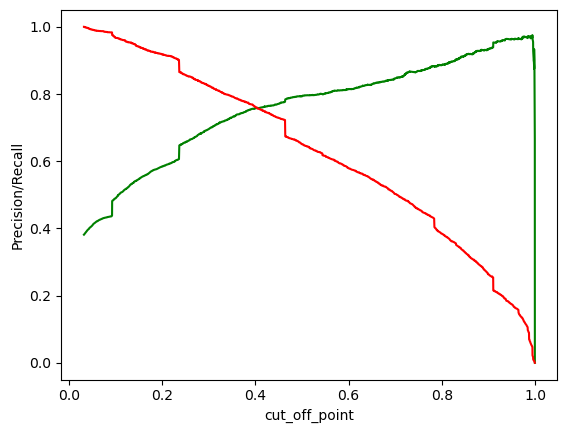

In [153]:
# plot precision-recall tradeoff curve
plt.plot(cut_off_point, p[:-1], "g-", label="Precision")
plt.plot(cut_off_point, r[:-1], "r-", label="Recall")
plt.xlabel('cut_off_point')
plt.ylabel('Precision/Recall')
plt.show()

The cut-off point or probability is approximately 0.41

In [154]:
# Copying final dataframe to evaluate with cut-off point 0.41
y_train_precision_recall=y_train_pred_final.copy()

In [155]:
# assigning a feature for 0.41 cutoff 
y_train_precision_recall["precision_recall_prediction"]=y_train_precision_recall["Converted_prob"].map(lambda x:1 if x>0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score,precision_recall_prediction
0,0,0.235935,1871,0,24,0
1,0,0.210631,6795,0,21,0
2,0,0.276393,3516,0,28,0
3,0,0.768209,8105,1,77,1
4,0,0.235935,3934,0,24,0


In [156]:
#creating confusion matrix
confusion3=metrics.confusion_matrix(y_train_precision_recall["Converted"],y_train_precision_recall["precision_recall_prediction"])
print(confusion3)

[[3412  590]
 [ 607 1859]]


In [157]:
#obtaining accuracy
print(100*(metrics.accuracy_score(y_train_precision_recall["Converted"],y_train_precision_recall["precision_recall_prediction"])))

81.4935064935065


In [158]:
#Checking other metrics
#True positive
TP=confusion3[1,1]
#True negative
TN=confusion3[0,0]
#False positive
FP=confusion3[0,1]
#False negative
FN=confusion3[1,0]

In [159]:
#accuracy
print("Accuracy:",(metrics.accuracy_score(y_train_precision_recall["Converted"],y_train_precision_recall["precision_recall_prediction"])))
#Sensitivity
print("Sensitivity:",(TP / float(TP+FN)))
#Specificity
print("Specificity:",(TN / float(TN+FP)))
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False positive Rate:",FP/float(TN+FP))
# positive predictive value
print("Positive Predictive Value:",TP/float(TP+FP))
# Negative predictive value
print("Negative Predctive Value:" ,TN/float(TN+FN))
#Precision
print("Precision:", precision_score(y_train_precision_recall["Converted"],y_train_precision_recall["precision_recall_prediction"]))
#Recall
print("Recall:", recall_score(y_train_precision_recall["Converted"],y_train_precision_recall["precision_recall_prediction"]))

Accuracy: 0.814935064935065
Sensitivity: 0.7538523925385239
Specificity: 0.8525737131434283
False positive Rate: 0.14742628685657172
Positive Predictive Value: 0.7590853409554921
Negative Predctive Value: 0.8489674048270714
Precision: 0.7590853409554921
Recall: 0.7538523925385239


### Comparing the metrics values from Optimal cut-off point method and Precision-Recall Trade off method

• The metrics values like sensitivity, precision and recall values from precision-recall curve with cut-off point as 0.41 are less and does not reached to 80%

• The metrics from optimal cut-off point method with cut-off point as 0.35 has sensitivity, precision and recall reached approximately 80%

So, its better to choose Optimal cut-off point for final predictions.

In [160]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.235935,1871,0,24
1,0,0.210631,6795,0,21
2,0,0.276393,3516,0,28
3,0,0.768209,8105,1,77
4,0,0.235935,3934,0,24


## 9. Model Evaluation for Test set

In [161]:
#Checking test data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 51 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Origin_Landing Page Submission               2772 non-null   uint8  
 1   Lead Origin_Lead Add Form                         2772 non-null   uint8  
 2   Lead Origin_Lead Import                           2772 non-null   uint8  
 3   Lead Origin_Quick Add Form                        2772 non-null   uint8  
 4   Lead Source_Facebook                              2772 non-null   uint8  
 5   Lead Source_Google                                2772 non-null   uint8  
 6   Lead Source_Olark Chat                            2772 non-null   uint8  
 7   Lead Source_Organic Search                        2772 non-null   uint8  
 8   Lead Source_Others                                2772 non-null   uint8  
 9   Lead Source_Refe

In [162]:
# fetching int64 and float64 dtype columns from dataframe for scaling
X_test[['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','free_copy_for_interview']] = scaler.transform(X_test[['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','free_copy_for_interview']])


In [163]:
#columns that obtained in the final model
cols=['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Finance Management',
       'Specialization_Rural and Agribusiness',
       'current_occupation_Working Professional',
       'Total Time Spent on Website']
X_test=X_test[cols]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Rural and Agribusiness,current_occupation_Working Professional,Total Time Spent on Website
4269,0,0,0,0,0,0,1,0,0,0,0,0.964504
2376,1,0,0,0,0,0,1,0,0,0,0,-0.885371
7766,0,0,0,0,0,0,0,1,0,0,1,-0.777416
9199,0,1,0,0,0,0,0,0,0,0,0,-0.885371
4359,1,0,0,1,0,0,0,0,0,0,0,-0.885371


### Prediction on Test Dataset

In [164]:
# Adding a constant value
X_test_sm=sm.add_constant(X_test)


In [165]:
#prediction using final model
y_test_pred=logm4.predict(X_test_sm)
y_test_pred[:10]

4269    0.681101
2376    0.910060
7766    0.661152
9199    0.092330
4359    0.783424
9186    0.489577
1631    0.508989
8963    0.146725
8007    0.081908
5324    0.279173
dtype: float64

In [166]:
#converting to dataframe for predicted probibilty
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.681101
2376,0.910060
7766,0.661152
9199,0.092330
4359,0.783424


In [167]:
#converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [168]:
#Adding "Prospect ID" to the Dataframe
y_test_df["Prospect ID"] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final=pd.concat([y_test_df,y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.681101
1,1,2376,0.910060
2,1,7766,0.661152
3,0,9199,0.092330
4,1,4359,0.783424


In [169]:
# Renaming the column
y_pred_final=y_pred_final.rename(columns={0:"Converted_Prob"})
# Rearranging the columns
y_pred_final=y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'],axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.681101
1,2376,1,0.910060
2,7766,1,0.661152
3,9199,0,0.092330
4,4359,1,0.783424


In [170]:
#For optimal probability 0.35
y_pred_final["final_Predicted"]=y_pred_final["Converted_Prob"].map(lambda x:1 if x>0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_Predicted
0,4269,1,0.681101,1
1,2376,1,0.910060,1
2,7766,1,0.661152,1
3,9199,0,0.092330,0
4,4359,1,0.783424,1


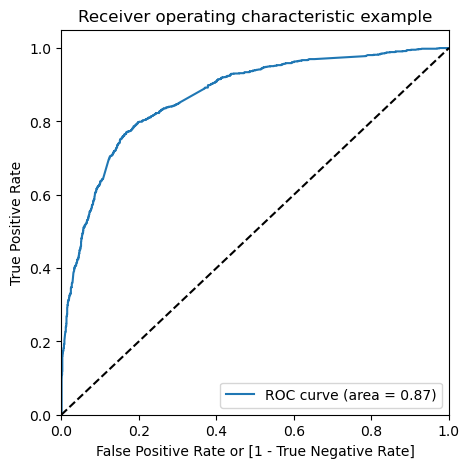

In [171]:
# Drawing ROC curve for Test Set
fpr,tpr,thresholds=metrics.roc_curve(y_pred_final["Converted"],y_pred_final["Converted_Prob"],drop_intermediate=False)
draw_roc(y_pred_final["Converted"],y_pred_final["Converted_Prob"])

Area under RoC is 0.87 which is a good predictive model

### Test model Evaluation

In [172]:
# Accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy : 0.8015873015873016


In [173]:
#confusion matrix
confusion4=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
print(confusion4)

[[1367  310]
 [ 240  855]]


In [174]:
#Checking other metrics
#True positive
TP=confusion4[1,1]
#True negative
TN=confusion4[0,0]
#False positive
FP=confusion4[0,1]
#False negative
FN=confusion4[1,0]

In [175]:
#Sensitivity
print("Sensitivity:",(TP / float(TP+FN)))
#Specificity
print("Specificity:",(TN / float(TN+FP)))
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False positive Rate:",FP/float(TN+FP))
# positive predictive value
print("Positive Predictive Value:",TP/float(TP+FP))
# Negative predictive value
print("Negative Predctive Value:" ,TN/float(TN+FN))
#print ("Negative predictive value :",TN / float(TN+ FN))
#Precision
print("Precision:", confusion4[1,1]/(confusion4[0,1]+confusion4[1,1]))
# Recall
print("Recall:",confusion4[1,1]/(confusion4[1,0]+confusion4[1,1]))

Sensitivity: 0.7808219178082192
Specificity: 0.8151460942158617
False positive Rate: 0.18485390578413835
Positive Predictive Value: 0.7339055793991416
Negative Predctive Value: 0.85065339141257
Precision: 0.7339055793991416
Recall: 0.7808219178082192


### Comparision of train set and Test set values

From above, it says that the metrics are close to each other. So the model works(Model 4) consistently good for train set and data set.

The model is able to predict approximately 80% conversion rate.

### Adding Lead_Score to test data

In [176]:
#Adding Lead_Score to test data
y_pred_final["Lead_Score"]=y_pred_final["Converted_Prob"].map(lambda x:round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_Predicted,Lead_Score
0,4269,1,0.681101,1,68
1,2376,1,0.910060,1,91
2,7766,1,0.661152,1,66
3,9199,0,0.092330,0,9
4,4359,1,0.783424,1,78


## RESULTS

### 1.Metrics Value:
The metrics for Train set and test set are:

     
        Metrics          Train Set            Test Set
        
        Accuracy    :      80.94               80.16
        Sensitivity :      79.24               78.02
        Specificity :      81.98               81.51    

Hence, the lead conversion rate is approximately 80%
Thus, the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80% and this obtained.

### 2. Hot leads

The customers who have lead_Score greater than or equal to 85 are termed as Hot leads. The lead conversion rate is very high for hot leads.

In [177]:
#hot leads
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_Predicted,Lead_Score
1,2376,1,0.910060,1,91
12,2935,1,0.884205,1,88
13,2907,1,0.879396,1,88
33,8429,1,0.986906,1,99
40,1200,1,0.938303,1,94
...,...,...,...,...,...
2733,5362,1,0.885228,1,89
2734,5741,1,0.873088,1,87
2740,6944,1,0.988081,1,99
2768,2152,1,0.910060,1,91


357 customers could be converted into leads

### 3. Prospect ID of the customers

In [178]:
#prospect Id of the customers 
print("The Prospect ID of the customers are:")
prospect_id=hot_leads["Prospect ID"].values.reshape(-1)
prospect_id

The Prospect ID of the customers are:


array([2376, 2935, 2907, 8429, 1200, 5638, 6666, 5448, 1287, 8103, 3444,
       2392, 5363, 8499, 4830, 7306, 3192, 2451, 1365, 6687, 5793, 8099,
       4868, 8120, 2844, 7396,   88, 7683, 6860, 4058,  269, 5666, 8113,
       4645, 2481, 3518, 1965, 3845, 2946, 4869, 7627,  954, 4902, 5818,
       2804,  446, 4786, 8348, 1026,   76, 5825, 8055, 2266, 2926, 2524,
       1867, 7503, 1467, 5697, 6725, 6156, 2055, 2549, 2653, 3478, 5687,
       5832, 3190,   77, 9026, 6243, 4038, 7187, 5812, 4646, 7033, 3188,
       8556, 7818, 1675, 3321, 2515, 1973, 7053, 1350, 8576, 6632, 7877,
       7334, 6375, 7222, 5586, 7482, 6383, 1425, 8904, 3172, 2158, 3919,
       5784, 3455, 5942, 6046,  472,  833, 4612, 2670, 9087, 3456, 2688,
       2914, 5263, 4613, 3945, 8098, 2662, 4281, 6010, 7636,  507, 2631,
       7448, 2578, 8920, 8412, 3339, 8054, 8082, 3113, 4607, 8087, 3488,
       8888, 2764, 6760, 3120, 7963, 5671, 8901, 7570, 8110, 4803, 5571,
       8641,  918, 3244, 8451,  818, 7453, 6987, 42

### 4. Features of the model

In [179]:
#Features and its values for the final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Origin_Lead Add Form                  3.583953
Last Activity_Had a Phone Conversation     3.186922
current_occupation_Working Professional    2.838692
Last Activity_SMS Sent                     2.139051
Lead Source_Welingak Website               2.008014
Last Activity_Others                       1.999648
Lead Source_Olark Chat                     1.123125
Last Activity_Unreachable                  1.120002
Last Activity_Email Opened                 1.110415
Total Time Spent on Website                1.096518
Specialization_Rural and Agribusiness      0.780593
Specialization_Finance Management          0.301746
const                                     -2.437811
dtype: float64

#### Suggestions: